In [3]:
import qsweepy.save_pkl
import pandas as pd
import matplotlib.pyplot as plt
import qsweepy.fitting as fitting
import numpy as np
%matplotlib qt5

In [2]:
from qsweepy import *
from qsweepy.ponyfiles import *
from qsweepy.fitters.multiqubit_spectra import *

Failed loading module Keysight_M3102A:  No module named 'keysightSD1'
Failed loading module Keysight_M3202A:  No module named 'keysightSD1'


In [4]:
from qsweepy.ponyfiles.data_structures import *

In [5]:
sample_name_old = '11qubits_021119'
sample_name = '11qubits_021119_2'

db = database.MyDatabase()

sweeper = sweep_extras.Sweeper(db, sample_name=sample_name)
exdir_db_inst = exdir_db.Exdir_db(db=db, sample_name=sample_name)
exdir_db_inst_old = exdir_db.Exdir_db(db=db, sample_name=sample_name_old)

In [6]:
qubits = {
          '1': {'r':{
                    'Fr': 6.260e9, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.258e9,#6.575e9,
                    'Fr_max': 6.262e9,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.405e9,
                      'min_voltage':-3.7,
                      'max_voltage':0.8,
                     'F01_max': 4.0787e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':20,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '2': {'r':{
                    'Fr': 6.307e9,#7.4095e9,#7.41e9, #7.413e9,# first sample # second sample 7.8816e9,#'Fr': 6.7335e9,
                    'Fr_min': 6.305e9,#7.395e9,#6.72e9,
                    'Fr_max': 6.309e9,#7.415e9,#down  8.32e9,#8.84e9,##6.788e9,#6.884e9,#6.92e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min':3.330e9,
                     'min_voltage':-3.6,
                      'max_voltage':0.8,
                    'F01_max':3.880e9},#5.8e9#5.010e9 - up},#{'F01_min':5.519e9},#5.52025
                    'P':
                     {
                     'nndac_coil_id':18,#2,!!!!!!!!
                         'max_voltage':4,
                     'awg_tek_coil_channel':4,
                     'coil_device_channel':4,
                     'P':None, 
                     }}},
        '3': {'r':{
                    'Fr': 6.3623e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.36e+09,#6.575e9,
                    'Fr_max': 6.364e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.362e9,
                      'min_voltage':-3.6,
                      'max_voltage':0.9,
                     'F01_max': 4.054e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':16,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }}
                },
          '4': {'r':{
                    'Fr': 6.414e+09, # first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.412e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.416e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.328e9,
                     'min_voltage':-3.6,
                      'max_voltage':0.8,
                    'F01_max': 3.88e9}, # not sure
                    'P':
                     {
                    'nndac_coil_id':13,#4,!!!!!!
                         'max_voltage':4,
                    'awg_tek_coil_channel':3,
                    'coil_device_channel':3,
                     'P':None, 
                     }
                }},
          '5': {'r':{
                    'Fr': 6.4587e9, # first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.4567e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.4607e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.278e9,
                      'min_voltage':-3.6,
                      'max_voltage':0.9,
                     'F01_max': 4.1e9}, 
                    'P':
                     {
                    'nndac_coil_id':12,#4,
                         'max_voltage':4,
                     'P':None, 
                     }
                }},
          '6': {'r':{
                    'Fr': 6.4984e+09, # first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.4964e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.5004e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.286e9,
                      'min_voltage':-3.6,
                      'max_voltage':0.9,
                    'F01_max': 3.806e9}, #4.1923e9# 4.17799e9 #4.467e9#4.464e9#4.203e9},#4.675e9},#4.484e9 -up},#{'F01_min':5.45525e9},#5.45678
                    'P':
                     {
                    'nndac_coil_id':10,#4, !!!!!!!!
                         'max_voltage':4,
                    'awg_tek_coil_channel':3,
                    'coil_device_channel':3,
                     'P':None, 
                     }
                }},
          '7': {'r':{
                    'Fr': 6.555e+09, #8.528e9 first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.553e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.557e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.374e9,
                      'min_voltage':-4,
                      'max_voltage':0.9,
                    'F01_max': 4.1e9}, #4.1923e9# 4.17799e9 #4.467e9#4.464e9#4.203e9},#4.675e9},#4.484e9 -up},#{'F01_min':5.45525e9},#5.45678
                    'P':
                     {
                    'nndac_coil_id':8,#4,
                         'max_voltage':4,
                    'awg_tek_coil_channel':3,
                    'coil_device_channel':3,
                     'P':None, 
                     }
                }},
          '8': {'r':{
                    'Fr': 6.606e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.604e+09,#6.575e9,
                    'Fr_max': 6.608e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.366e9,
                       'min_voltage':-3,
                      'max_voltage':0.9,
                    'F01_max': 3.914e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':6,#0,
                      'max_voltage':3,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '9': {'r':{
                    'Fr': 6.658e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.656e+09,#6.575e9,
                    'Fr_max': 6.660e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.348e9,
                       'min_voltage':-3.6,
                      'max_voltage':0.9,
                    'F01_max': 4.056e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':4,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '10': {'r':{
                    'Fr': 6.711e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.709e+09,#6.575e9,
                    'Fr_max': 6.713e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.266e9,
                       'min_voltage':-3.6,
                      'max_voltage':0.9,
                    'F01_max': 3.882e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':2,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '11': {'r':{
                    'Fr': 6.763e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.761e+09,#6.575e9,
                    'Fr_max': 6.765e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.720e9,
                       'min_voltage':-1.5,
                      'max_voltage':0.7,
                      'F01_max': 3.976e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':0,#0,
                      'max_voltage':1.5,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          
                }

L_mat=np.asarray([[0.76939763, -0.1522447600000001, -0.07305767000000007],
  [0.16715004, 0.69026974, -0.56578149],
  [-0.22264723999999997, 0.15251167, 0.50282611]])
phi0_vec = np.asarray([1.7158459319724217e-05, 0.003311514714469841, -0.001214951726275308])

 

qubit_id = '1'
#qubits = {qubit_id: qubit for qubit_id, qubit in qubits.items() if qubit_id == '2'}
qubits = {qubit_id: qubit for qubit_id, qubit in qubits.items()}

In [8]:
for qubit_id, qubit in qubits.items():
    exdir_db_inst.save(metadata={'qubit_id':qubit_id,
                                 'coil_id': qubit['q']['P']['nndac_coil_id'],
                                 'max_voltage': qubit['q']['P']['max_voltage']},
                      measurement_type='nndac_coil_parameters')

D:\qtlab_replacement\qsweepy\config.py:65: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



# Fiting

## define P0_podgon by hand

In [7]:
P0_podgon=[]
P0_podgon.append([ 6.2580e+09 , 0.8e-2, 1.126172185e+10 , 1.968976245e+09,
 15.6e7  ,1.67249366e-01 , 3.73827488e+09 , 1.4e-02,
 -1.11824314e-01])
P0_podgon.append([ 6.30402755e+09, 1.00433465e-01,  1.10791479e+10,  1.81756150e+09,
  1.56453522e8 , 1.12700864e-01,  3.49202273e+09,  1.33511318e-02,
  3.81e+09,  3.67075470e-03 ,-1.12179379e-01])
P0_podgon.append([ 6.36225166e+09,  8.01428025e-03,  11.1737426e+9  ,1.97694132e+09,
  1.54664926e8,  1.30521521e-01 , 3.745e+09,  1.55816528e-02,
  3.39515926e+09,  5.5e-03, -1.12493371e-01])
P0_podgon.append([ 6.40841572e+09,  8.22852090e-03 , 10.9700248e+9,  1.81105101e+09,
  1.52069379e8,  9.36280952e-02,  3.69504818e+09,  4.23426909e-03,
  3.43573031e+09,  1.43409101e-02, -1.13008285e-01])


P0_podgon.append([ 6.45635702e+09,  8.18269462e-03 , 1.06976578e+10,  1.87684245e+09,
  1.52115447e8,1.19280752e-01,  3.69186235e+09,  1.37770096e-02,
  3.37736765e9, 4.21426273e-03, -1.11034501e-01])
P0_podgon.append([ 6.51131535e+09 , 7.13322583e-03 , 1.06039210e+10,  1.72205231e+09,
  1.50883075e8,  1.10332648e-01 , 3.4027e+09,  0.0137656319,
  3.830400000e+09,  2.10714367e-03, -0.10783])
P0_podgon.append([ 6.55548153e+09 , 7.97470585e-03 , 10.819975200e9 , 1.916046630e+09,
  1.60569224e8,  1.23663198e-01 , 3.74186235e+09 , 1.41637373e-02,
  3.26594545e+09,  4.19698619e-03 ,-0.10364])

P0_podgon.append([ 6.59770969e+09,  7.98155806e-03,  10.6525791e+9,  1.90081752e+09,
  1.56086696e8 ,  1.23506594e-01 , 3.472328770e+09,  1.27624657e-02,
  3.83477214e+09 , 2.20179632e-03, -1.1033062e-01])

#bad, for that plot imag instead of abs
P0_podgon.append([ 6.64811198e+09 , 8.25895819e-03 , 1.07552449e+10,  1.97619114e+09,
  1.59670032e+08 , 1.06039140e-01 , 3.71588208e+09 , 1.31150042e-02,
  3.37385562e+09 , 2.86013948e-03 ,-1.10384262e-01])


P0_podgon.append([ 6.70439151e+09 , 3.22735365e-03,  1.10300220e+10 , 2.01422532e+09,
  1.48719050e+08 , 6.40084007e-02  ,3.10404748e+09 , 9.38689745e-04,
  4.05079224e+09,  2.41081760e-02, -1.05869225e-01])
P0_podgon.append([ 6.74890174e+09 , 8.51114362e-03,  1.22839136e+10,  2.09571837e+09,
  1.37370083e+08,  7.56021965e-02 , 3.97455349e+09,  7.57610957e-04,
 -0.10742856])


## load spectra

In [45]:
from  qsweepy.fitters import multiqubit_spectra
import importlib
importlib.reload(multiqubit_spectra)
from qsweepy.fitters.multiqubit_spectra import *
spectra=load_spectrum_data_for_fit(exdir_db_inst, qubits.keys())

## save P0_podgon to db

In [9]:
for qubit_id, p0 in enumerate(P0_podgon):
    exdir_db_inst.save(metadata={'qubit_id':qubit_id+1,
                                 'frb':p0[0], 
                                 'Cc':p0[1], 
                                 'EJ1':p0[2],
                                 'EJ2':p0[3],
                                 'EC':p0[4], 
                                 'phi0':p0[5],
                                 'L':p0[6]},
                      measurement_type='Adaptive_two_tone_spectroscopy_parameters')

D:\qtlab_replacement\qsweepy\config.py:65: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



## function for adaptive and non-adaptive two-tone plotting

In [50]:
def two_tone_adaptive_plot(x,y,z,fit_params,fit=None,axes=None):
    if not axes:
        plt.figure()
        axes = plt
    fr_diag=fq_coil(fit_params,x)
    step=np.abs(x[1]-x[0])/2
    for _id in range(len(x)):
        x_plot1 = (x[_id]-step)
        x_plot2 = (x[_id]+step)
        
        if axes is not None:
            axes.pcolormesh([x_plot1, x_plot2], (y/1e3+fr_diag[_id])*1e9,z[_id].reshape(len(y),1), cmap='Spectral_r')
        else:
            axes.pcolormesh([x_plot1, x_plot2], (y/1e3+fr_diag[_id]),z[_id].reshape(len(y),1), cmap='Spectral_r')
    if fit is not None:
        axes.plot(x,fit,'go')
#         plt.plot(x,fit,'g')
def data_abs(meas):
    for i in range(len(meas)):
        meas[i]=meas[i]-np.median(np.real(meas[i]))-1j*np.median(np.imag(meas[i]))
    return meas
def two_tone1_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L= fit_params
    return fq_q1(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,L)
def two_tone2_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L= fit_params
    return fq_q2(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L)
def fq_coil(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[-1]
    return fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
def find_freqs_abs(data,Y):
    arg=[np.argmax((np.abs(data.T)-np.mean(np.abs(data.T)))[:,i]) for i in range(len(data))]
    return Y[arg]
def find_freqs_min(data,Y):
    arg=[np.argmin(data[i]) for i in range(len(data))]
#     print(arg)
    return Y[arg]
def fq_coil_qubit1(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL= p[:8]
    L = p[-1]
    return fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,L)/1e9
def fq_coil_qubit2(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL,fqR, CcR,= p[:10]
    L = p[-1]
    return fq_q2(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,fqR, CcR,L)/1e9
fq_q2  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L: (fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0,fqL, CcL, L)+fqR)*0.5-(((fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)-fqR)*0.5)**2+CcR**2*fq_q1(x, frb,Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)*fqR)**0.5*np.sign(fqR-fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0, fqL, CcL, L))
fq_q1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_r(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
fq_r  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+\
                                                    (EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25


## non-adaptive two-tone spectra plotting

In [12]:
# don't delete it
%matplotlib qt5
qubit_id='7'
# meas = exdir_db_inst.select_measurement(measurement_type="tone_tone_diagonal", 
#                             metadata={'qubit_id':qubit_id})

meas = exdir_db_inst.select_measurement(measurement_type="two_tone_diagonal", 
                            metadata={'qubit_id':qubit_id})

# meas = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy_2", 
#                             metadata={'resonator_id':qubit_id})

# meas=exdir_db_inst.select_measurement_by_id(4860)
# p = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy_parameters", 
#                             metadata={'qubit_id':qubit_id}).metadata
x = meas.datasets['S-parameter'].parameters[0].values[:]
# p0 = [float(p[key]) for key in ['frb', 'Cc', 'EJ1', 'EJ2', 'EC', 'phi0', 'L']]
# fr_diag=fq_coil(p0,x)
y = meas.datasets['S-parameter'].parameters[1].values[:]+3.4e9
z = meas.datasets['S-parameter'].data[:,:,-1]
z = data_abs(z)
fit=find_freqs_abs(z,y)
plt.figure()
plt.pcolormesh(x,y,np.abs(z).T)
plt.plot(x,fit,'ro')
# plt.plot(y,np.abs(z[0]))
# two_tone_adaptive_plot(x,y,np.abs(z))


## Plotting diagonal two-tone adaptive spectrum

In [21]:
# don't delete it
%matplotlib qt5
def find_freqs_from_adapt(data,X,Y,params):
    fr_diag=fq_coil(P0_podgon[qubit_id_],X)
    fit=np.zeros(len(X))
    for _id in range(len(X)):
        arg=np.argmax((np.abs(data.T)-np.mean(np.abs(data.T)))[:,_id]) 
        fit[_id]=(Y[arg]/1e3+fr_diag[_id])*1e9
    return fit
for qubit_id_, qubit_id in enumerate(qubits.keys()):
    
    meas = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy", 
                            metadata={'qubit_id':qubit_id})

    x = meas.datasets['S-parameter'].parameters[0].values[:]
    y = meas.datasets['S-parameter'].parameters[1].values[:]
    z = meas.datasets['S-parameter'].data[:,:,0]
    z = np.abs(data_abs(z))
    
    two_tone_adaptive_plot(x,y,z,P0_podgon[qubit_id_],None,None)
    #plt.figure()
    fit=find_freqs_from_adapt(z,x,y,P0_podgon[qubit_id_])
    d2_abs = np.abs(np.gradient(np.gradient(fit)))
    d2_abs_av = np.median(d2_abs)
    good_points= d2_abs<d2_abs_av*3
    data=fit[good_points]
    #data=fit#np.asarray(find_freqs_abs(np.abs(two_tone_data_z[(int(qubit_id)-1)]),two_tone_data_y[(int(qubit_id)-1)]))
    current_points=x[good_points]
    plt.plot(current_points,data,'ro')

## fitting coupled oscillators model

In [21]:
build_parameters_dict_from_podgon_list(p0, p_fixed, qubits.keys())

{'EJ1': {'1': 11816000000.0,
  '2': 11168000000.0,
  '3': 11815000000.0,
  '4': 11263000000.0,
  '5': 10981000000.0,
  '6': 10909000000.0,
  '7': 11666000000.0,
  '8': 10903000000.0,
  '9': 11563000000.0,
  '10': 11045000000.0,
  '11': 11265000000.0},
 'EJ2': {'1': 1943500000.0,
  '2': 1673100000.0,
  '3': 1911400000.0,
  '4': 1769400000.0,
  '5': 1810700000.0,
  '6': 1607900000.0,
  '7': 1988800000.0,
  '8': 2189100000.0,
  '9': 2001000000.0,
  '10': 1941000000.0,
  '11': 1945600000.0},
 'phi0': {'1': 0.1672,
  '2': 0.1127,
  '3': 0.1305,
  '4': 0.0936,
  '5': 0.1193,
  '6': 0.1103,
  '7': 0.1237,
  '8': 0.1235,
  '9': 0.106,
  '10': 0.064,
  '11': 0.0756},
 'qubits': dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']),
 'inductance_matrix_type': 'chain-nn',
 'qubit_resonator_individual': 'equal_claws',
 'qubit_qubit_coupling': 'alternating-chain-nn',
 'EC': 155000000.0,
 'g': 637.491792986728,
 'J1': 0.013269317721392351,
 'J2': 0.0038131487981033206,
 'fr': {'1': 62

In [19]:
from scipy.optimize import least_squares
p0_dict = build_p0_dict(qubits=qubits)
p_fixed = {'fr': {qubit_id: qubit['r']['Fr'] for qubit_id, qubit in qubits.items()}, 'EC':155e6}

def residuals(p):
    p_dict = build_parameters_dict_from_podgon_list(p, p_fixed, qubits.keys())
    y = np.asarray(spectra['f'])
    y_pred = np.asarray(model(p_dict, spectra))
    print ('cost:', np.sum(np.arctan(np.abs(y-y_pred))))
    return y-y_pred

p0 =  build_podgon_list_from_parameters_dict(p0_dict)
bounds = build_bounds_from_parameters_dict(p0_dict)
print ('parametric space size: ', len(p0))

fitresults = least_squares(residuals, p0,bounds=bounds,loss='linear', x_scale=np.abs(p0), max_nfev=40,verbose=2)

parametric space size:  67
cost: 273.12797534760267
cost: 273.1279679937225
cost: 273.1279656384729
cost: 273.1279653444626


KeyboardInterrupt: 

In [31]:
p_fixed = {'fr': {qubit_id: qubit['r']['Fr'] for qubit_id, qubit in qubits.items()}, 'EC':155e6}
model_result_fit = model( build_parameters_dict_from_podgon_list(fitresults.x,p_fixed, qubits.keys()),spectra)
save_parameters_dict(exdir_db_inst, build_parameters_dict_from_podgon_list(fitresults.x,p_fixed, qubits.keys()))

D:\qtlab_replacement\qsweepy\config.py:65: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



start: 2019-11-21 10:28:51.802644, started/done/total sweeps: 0/0/0, 
Measured data: 
'EJ1': parameters: qubit_id (),:[1, 11] (11 points) without setter
data: [1.23073118e+10 1.15752792e+10 1.20878318e+10 1.16701616e+10
 1.14375683e+10 1.12606528e+10 1.22175413e+10 1.15032462e+10
 1.20257939e+10 1.14438513e+10 1.17722340e+10]
'EJ2': parameters: qubit_id (),:[1, 11] (11 points) without setter
data: [2.05355564e+09 1.76405441e+09 2.08430021e+09 1.86242998e+09
 1.91810946e+09 1.71267555e+09 2.03385053e+09 2.07666422e+09
 2.10091959e+09 2.00837396e+09 1.98012910e+09]
'fr': parameters: qubit_id (),:[1, 11] (11 points) without setter
data: [6.2600e+09 6.3070e+09 6.3623e+09 6.4140e+09 6.4587e+09 6.4984e+09
 6.5550e+09 6.6060e+09 6.6580e+09 6.7110e+09 6.7630e+09]
'phi0': parameters: qubit_id (),:[1, 11] (11 points) without setter
data: [0.08036709 0.0853833  0.08758273 0.08723926 0.08801861 0.08567764
 0.08103191 0.07807059 0.07587998 0.06779783 0.07454679]
'L': parameters: coil_id (),:[1, 11]

## refit φ0 with new diagonals and old parameters dict

In [46]:
params_dict_old

{'inductance_matrix_type': 'chain-nn',
 'qubit_resonator_individual': 'equal_claws',
 'qubit_qubit_coupling': 'alternating-chain-nn',
 'EC': 155000000.0,
 'g': 637.491792986728,
 'J1': 0.013269317721392351,
 'J2': 0.0038131487981033206,
 'EJ1': {'1': 12307311816.10025,
  '2': 11575279216.518478,
  '3': 12087831752.372967,
  '4': 11670161593.326704,
  '5': 11437568285.911942,
  '6': 11260652821.585165,
  '7': 12217541337.228148,
  '8': 11503246180.41603,
  '9': 12025793913.146032,
  '10': 11443851304.055477,
  '11': 11772234027.64169},
 'EJ2': {'1': 2053555641.5778756,
  '2': 1764054414.0267494,
  '3': 2084300209.662846,
  '4': 1862429983.3586369,
  '5': 1918109461.9909475,
  '6': 1712675551.8010068,
  '7': 2033850526.2037184,
  '8': 2076664215.651093,
  '9': 2100919586.3047974,
  '10': 2008373959.732713,
  '11': 1980129103.5217643},
 'fr': {'1': 6260000000.0,
  '2': 6307000000.0,
  '3': 6362300000.0,
  '4': 6414000000.0,
  '5': 6458700000.0,
  '6': 6498400000.0,
  '7': 6555000000.0,
  

In [47]:
params_dict_old = load_parameters_dict(exdir_db_inst_old)
p_fixed = params_dict_old.copy()
del p_fixed['phi0']
del p_fixed['EJ1']
del p_fixed['EJ2']
p_fixed

from scipy.optimize import least_squares
p0_dict = build_p0_dict(qubits=qubits)

def residuals(p):
    p_dict = build_parameters_dict_from_podgon_list(p, p_fixed, qubits.keys())
    y = np.asarray(spectra['f'])
    y_pred = np.asarray(model(p_dict, spectra))
    print ('cost:', np.sum(np.arctan(np.abs(y-y_pred))))
    return y-y_pred

p0 =  build_podgon_list_from_parameters_dict(p0_dict, p_fixed)
bounds = build_bounds_from_parameters_dict(p0_dict, p_fixed)
print ('parametric space size: ', len(p0))

fitresults = least_squares(residuals, p0,bounds=bounds,loss='linear', x_scale=np.abs(p0), max_nfev=40,verbose=2)

parametric space size:  33
cost: 682.1784540179154
cost: 682.1784502244006
cost: 682.1784477464105


KeyboardInterrupt: 

## plot fitted spectra

In [35]:
params = load_parameters_dict(exdir_db_inst_old)
params['qubits'] = qubits.keys()

In [ ]:
params

In [48]:
params = p0_dict.copy()
params.update(p_fixed)
params

{'qubits': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
 'fr': {'1': 6260000000.0,
  '2': 6307000000.0,
  '3': 6362300000.0,
  '4': 6414000000.0,
  '5': 6458700000.0,
  '6': 6498400000.0,
  '7': 6555000000.0,
  '8': 6606000000.0,
  '9': 6658000000.0,
  '10': 6711000000.0,
  '11': 6763000000.0},
 'EJ1': {'1': 11816000000.0,
  '2': 11168000000.0,
  '3': 11815000000.0,
  '4': 11263000000.0,
  '5': 10981000000.0,
  '6': 10909000000.0,
  '7': 11666000000.0,
  '8': 10903000000.0,
  '9': 11563000000.0,
  '10': 11045000000.0,
  '11': 11265000000.0},
 'EJ2': {'1': 1943500000.0,
  '2': 1673100000.0,
  '3': 1911400000.0,
  '4': 1769400000.0,
  '5': 1810700000.0,
  '6': 1607900000.0,
  '7': 1988800000.0,
  '8': 2189100000.0,
  '9': 2001000000.0,
  '10': 1941000000.0,
  '11': 1945600000.0},
 'phi0': {'1': 0.1672,
  '2': 0.1127,
  '3': 0.1305,
  '4': 0.0936,
  '5': 0.1193,
  '6': 0.1103,
  '7': 0.1237,
  '8': 0.1235,
  '9': 0.106,
  '10': 0.064,
  '11': 0.0756},
 'J1': 0.01326931772139

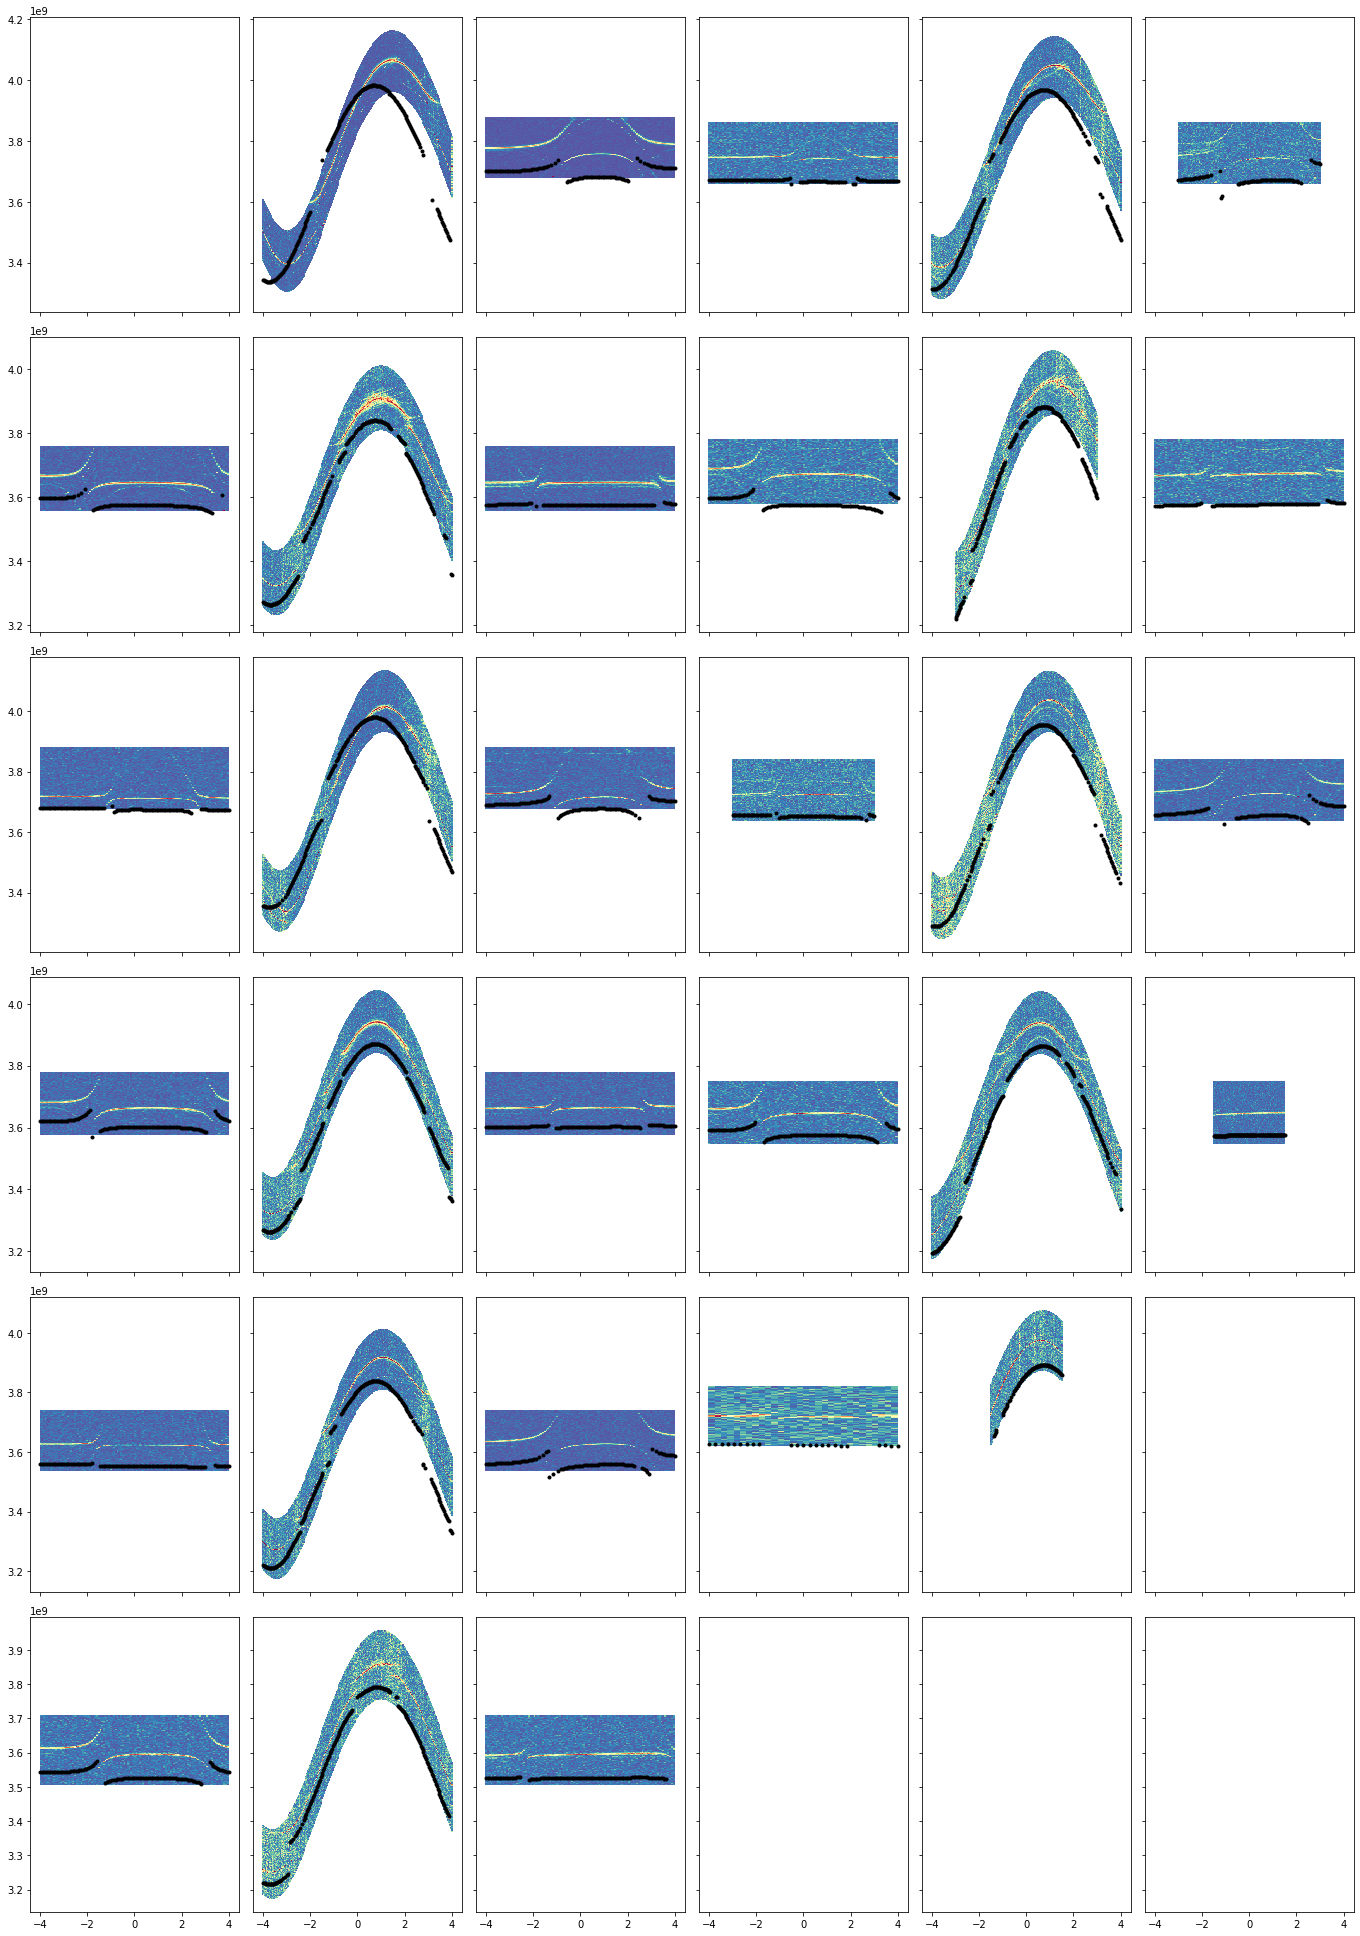

In [42]:
%matplotlib inline
fig, axes = plt.subplots(6,6, figsize=(19,27), sharex=True, sharey='row')
for qubit_id_, qubit_id in enumerate(qubits.keys()):
    meas, p = get_Adaptive_two_tone_sprectoscopy_measurement(exdir_db_inst, qubit_id)
    x1, y1, meta = get_Adaptive_two_tone_spectroscopy(exdir_db_inst, qubit_id)
    x1_ = load_spectrum_data_for_fit(exdir_db_inst, [qubit_id], [qubit_id], qubits.keys())
    y1_ = np.asarray(model( params, x1_))
        
    x = meas.datasets['S-parameter'].parameters[0].values[:]
    y = meas.datasets['S-parameter'].parameters[1].values[:]
    z = meas.datasets['S-parameter'].data[:,:,0]
    z = np.abs(data_abs(z))
    
    two_tone_adaptive_plot(x,y,z,P0_podgon[qubit_id_],None, 
                           axes=axes[qubit_id_ % 6, (qubit_id_ // 6) * 3 + 1])
    axes[qubit_id_ % 6, (qubit_id_ // 6) * 3 + 1].plot(x1, np.asarray(y1_)*1e9, marker='.', color='black', linestyle='')
    
    if qubit_id_ > 0:
        meas = get_Nondiag_two_tone_spectroscopy_measurement(exdir_db_inst, qubit_id, str(int(qubit_id)-1))
        x1,y1,meta = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, qubit_id, str(int(qubit_id)-1))
        x1_ = load_spectrum_data_for_fit(exdir_db_inst, [qubit_id], [str(int(qubit_id)-1)], qubits.keys())
        y1_ = model( params ,x1_)
        x = meas.datasets['S-parameter'].parameters[0].values[:]
        y = meas.datasets['S-parameter'].parameters[1].values[:]
        z = meas.datasets['S-parameter'].data[:,:,0]
        z = np.abs(data_abs(z))
        axes[qubit_id_ % 6, (qubit_id_ // 6) * 3].pcolormesh(x,y,z.T, cmap='Spectral_r')
        axes[qubit_id_ % 6, (qubit_id_ // 6) * 3].plot(x1, np.asarray(y1_)*1e9, marker='.', color='black', linestyle='')
    if qubit_id_ <len(qubits)-1:
        meas = get_Nondiag_two_tone_spectroscopy_measurement(exdir_db_inst, qubit_id, str(int(qubit_id)+1))
        x1,y1,meta = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, qubit_id, str(int(qubit_id)+1))
        x1_ = load_spectrum_data_for_fit(exdir_db_inst, [qubit_id], [str(int(qubit_id)+1)], qubits.keys())
        y1_ = model( params, x1_)
        x = meas.datasets['S-parameter'].parameters[0].values[:]
        y = meas.datasets['S-parameter'].parameters[1].values[:]
        z = meas.datasets['S-parameter'].data[:,:,0]
        z = np.abs(data_abs(z))
        axes[qubit_id_ % 6, (qubit_id_ // 6) * 3 + 2].pcolormesh(x,y,z.T, cmap='Spectral_r')
        axes[qubit_id_ % 6, (qubit_id_ // 6) * 3 + 2].plot(x1, np.asarray(y1_)*1e9, marker='.', color='black', linestyle='')
        
plt.tight_layout()
# plt.draw()
plt.show()

In [ ]:
%matplotlib qt5
fig, axes = plt.subplots(1,11, figsize=(19,8), sharex=True, sharey='row')
for qubit_id_, qubit_id in enumerate(qubits.keys()):
    meas, p = get_Adaptive_two_tone_sprectoscopy_measurement(exdir_db_inst, qubit_id)
    x1, y1, meta = get_Adaptive_two_tone_spectroscopy(exdir_db_inst, qubit_id)
    x1_ = load_spectrum_data_for_fit(exdir_db_inst, [qubit_id], [qubit_id], qubits.keys())
    y1_ = np.asarray(model( params, x1_))
        
    x = meas.datasets['S-parameter'].parameters[0].values[:]
    y = meas.datasets['S-parameter'].parameters[1].values[:]
    z = meas.datasets['S-parameter'].data[:,:,0]
    z = np.abs(data_abs(z))
    
    two_tone_adaptive_plot(x,y,z,P0_podgon[qubit_id_],None, 
                           axes=axes[qubit_id_])
    axes[qubit_id_].plot(x1, np.asarray(y1_)*1e9, marker='.', color='black', linestyle='')
    axes[qubit_id_].grid(True)
        
plt.tight_layout()
# plt.draw()

plt.show()

In [22]:
fig.savefig("11q_spectra_fit_diag")

In [ ]:
fitresults.x

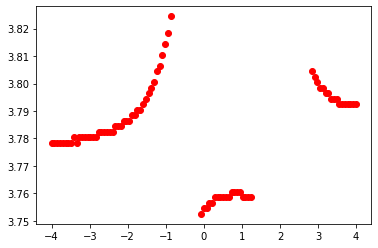

In [16]:
import pandas as pd
#get_Adaptive_two_tone_spectroscopy('1')
x,y,m = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, '1', '2')
x,y = remove_outliers(x,y)
plt.plot(x,y,"ro")

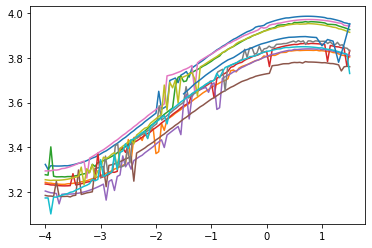

In [62]:
for i in range(11):
    plt.plot(data[i][0],data[i][1])

In [35]:
two_tone_fit=[]
two_tone_data_z=[]
two_tone_data_x=[]
two_tone_data_y=[]
Qubits=qubits.keys()
for _id in qubits.keys():
    two_tone_fit.append(exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy", 
                            metadata={'resonator_id':_id}))
    two_tone_data_x.append(two_tone_fit[int(_id)-1].datasets['S-parameter'].parameters[0].values[:])
    two_tone_data_y.append(two_tone_fit[int(_id)-1].datasets['S-parameter'].parameters[1].values[:])
    if _id!='9':
        fit= data_abs(two_tone_fit[int(_id)-1].datasets['S-parameter'].data[:,:,0])
        fit = find_freqs_abs(fit,two_tone_fit[int(_id)-1].datasets['S-parameter'].parameters[1].values[:])
#         print(P0_podgon[int(_id)-1])
        fr_diag=fq_coil(P0_podgon[int(_id)-1],two_tone_fit[int(_id)-1].datasets['S-parameter'].parameters[0].values[:])
        two_tone_data_z.append(fit/1e3+fr_diag)
    if _id=='9':
        fit=two_tone_fit[int(_id)-1].datasets['S-parameter'].data[:,:,0]
        for i in range(len(fit)):
            fit[i]=fit[i]-np.median(np.real(fit[i]))-1j*np.median(np.imag(fit[i]))
        fit = find_freqs_min(np.imag(fit),two_tone_fit[int(_id)-1].datasets['S-parameter'].parameters[1].values[:])
        fr_diag=fq_coil(P0_podgon[int(_id)-1],two_tone_fit[int(_id)-1].datasets['S-parameter'].parameters[0].values[:])
        two_tone_data_z.append(fit/1e3+fr_diag)
    

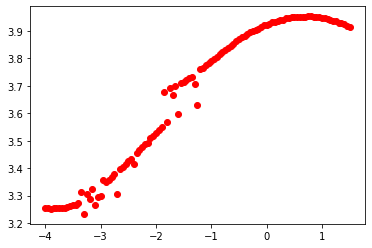

In [36]:
i=8
plt.plot(two_tone_data_x[i],two_tone_data_z[i],'ro')

In [20]:
# for all one tones
i=8
two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
             np.imag(two_tone_data_z[i]),P0_podgon[i],None)
x=np.linspace(-4,1.5,500)
fr_diag=fq_coil(P0_podgon[i],data8x)
freqs=find_freqs_min(np.imag(two_tone_data_z[i]),two_tone_data_y[i])/1e3+fr_diag
d2_abs = np.abs(np.gradient(np.gradient(freqs)))
d2_abs_av = np.median(d2_abs)
good_points= d2_abs<d2_abs_av*7
plt.plot(two_tone_data_x[i][good_points],freqs[good_points],'wo')
plt.plot(x,np.asarray(two_tone2_fit_points(x,P0_podgon_twotone[i])/1e9),"ro")

NameError: name 'two_tone_adaptive_plot' is not defined

In [382]:
x=np.linspace(-4,1.5,500)
plt.plot(x,np.asarray(two_tone2_fit_points(x,P0_podgon_twotone[1])/1e9),"ro")
# plt.plot(x,np.asarray(two_tone2_fit_points(x,L_fit)/1e9),"ro")

In [62]:
P0_pd = pd.DataFrame(P0_podgon_twotone, 
                              columns=['fr', 'g', 'EJ1', 'EJ2', 'EC', 'phi0', 'fl', 'cl', 'fr', 'cr', 'L'])

#P0_pd
P0_pd['fmax'] = np.sqrt(8*(P0_pd['EJ1']+P0_pd['EJ2'])*P0_pd['EC'])-P0_pd['EC']
P0_pd['fmin'] = np.sqrt(8*(P0_pd['EJ1']-P0_pd['EJ2'])*P0_pd['EC'])-P0_pd['EC']
P0_pd


,fr,g,EJ1,EJ2,EC,phi0,fl,cl,fr,cr,L,fmax,fmin
0,6.258000e+09,0.008000,1.126172e+10,1.968976e+09,156000000.0,0.079606,3.738275e+09,0.014000,NaN,NaN,-0.111824,3.907485e+09,3.249488e+09
1,6.304028e+09,0.100433,1.107915e+10,1.817562e+09,156453522.0,0.086867,3.492023e+09,0.013351,3.810000e+09,0.003671,-0.112179,3.861243e+09,3.248258e+09
2,6.362252e+09,0.008014,1.117374e+10,1.976941e+09,154664926.0,0.082752,3.745000e+09,0.015582,3.395159e+09,0.005500,-0.112493,3.879142e+09,3.218669e+09
3,6.408416e+09,0.008229,1.097002e+10,1.811051e+09,152069379.0,0.084471,3.695048e+09,0.004234,3.435730e+09,0.014341,-0.113008,3.791138e+09,3.185953e+09
4,6.456357e+09,0.008183,1.069766e+10,1.876842e+09,152115447.0,0.086074,3.691862e+09,0.013777,3.377368e+09,0.004214,-0.111035,3.759688e+09,3.124202e+09
5,6.511315e+09,0.007133,1.060392e+10,1.722052e+09,150883075.0,0.091876,3.402700e+09,0.013766,3.830400e+09,0.002107,-0.107830,3.706350e+09,3.123409e+09
6,6.555482e+09,0.007975,1.081998e+10,1.916047e+09,160569224.0,0.075857,3.741862e+09,0.014164,3.265945e+09,0.004197,-0.103640,3.884193e+09,3.221379e+09
7,6.597710e+09,0.007982,1.065258e+10,1.900818e+09,156086696.0,0.081527,3.472329e+09,0.012762,3.834772e+09,0.002202,-0.110331,3.803124e+09,3.149706e+09
8,6.648112e+09,0.008259,1.075524e+10,1.976191e+09,159670032.0,0.075787,3.715882e+09,0.013115,3.373856e+09,0.002860,-0.110384,3.873025e+09,3.189063e+09
9,6.703523e+09,0.008000,1.090992e+10,1.955052e+09,150000000.0,0.070322,3.442329e+09,0.013762,3.809000e+09,0.004202,-0.107668,3.779118e+09,3.128085e+09


In [11]:
%matplotlib qt5
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

a, =plt.plot([],[],'ro')
plt.show()
plt.ylim(3.2,4.2)
plt.xlim(-4,1.5)
i=8
two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
                 np.imag(two_tone_data_z[i]),P0_podgon[i],None)

def f(frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L):
    a.set_data(two_tone_data_x[i],fq_q2(two_tone_data_x[i],
                                        frb, Cc, EJ1,
                                        EJ2, EC, phi0,fqL,
                                        CcL, fqR, CcR, L)/1e9)
  
    print(frb)
    print(Cc)
    print(EJ1)
    print(EJ2)
    print(EC)
    print(phi0)
    print(fqL)
    print(CcL)
    print(fqR)
    print(CcR)
    print(L)
    
interactive(f, frb=(P0_podgon_twotone[i][0],P0_podgon_twotone[i][0]),
            Cc=(P0_podgon_twotone[i][1],P0_podgon_twotone[i][1]),
            EJ1=(P0_podgon_twotone[i][2]-700e6,P0_podgon_twotone[i][2]+700e6,1e6),
            EJ2=(P0_podgon_twotone[i][3]-400e6,P0_podgon_twotone[i][3]+400e6,1e6),
            EC=(P0_podgon_twotone[i][4],P0_podgon_twotone[i][4]),
            phi0=(P0_podgon_twotone[i][5],P0_podgon_twotone[i][5]),
            fqL=(P0_podgon_twotone[i][6]-100e6, P0_podgon_twotone[i][6]+100e6,1e6),
            CcL=(P0_podgon_twotone[i][7]-1e-1,P0_podgon_twotone[i][7]+1e-1,1e-4),
            fqR=(P0_podgon_twotone[i][8]-100e6, P0_podgon_twotone[i][8]+100e6,1e6),
            CcR=(P0_podgon_twotone[i][9]-1e-2,P0_podgon_twotone[i][9]+1e-2,1e-6),
            L=((P0_podgon_twotone[i][10]-1e-1,P0_podgon_twotone[i][10]+1e-1,1e-3)))

interactive(children=(FloatSlider(value=6648111980.0, description='frb', max=6648111980.0, min=6648111980.0), …

In [40]:
two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
                 two_tone_data_z[i],P0_podgon[i],None)

In [15]:
%matplotlib inline

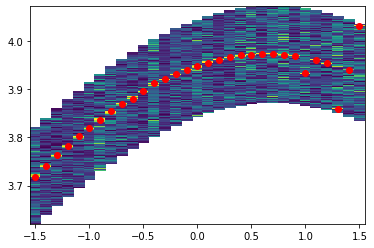

In [16]:
i=10
two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
             np.abs(two_tone_data_z[i]),P0_podgon[i],None)
x=np.linspace(-4,1.5,500)
# plt.plot(x,np.asarray(two_tone2_fit_points(x,P0_podgon_twotone[i])/1e9),"ro")
fr_diag=fq_coil(P0_podgon[i],two_tone_data_x[i])
plt.plot(two_tone_data_x[i],np.asarray(find_freqs_abs(np.abs(two_tone_data_z[i]),two_tone_data_y[i]))/1e3+fr_diag,'ro')

### for qubits with  one neighbour

In [250]:
from scipy.optimize import least_squares
fitresults_vec=[]
Qubits=[qubit_id]
# Qubits=qubits.keys()
for qubit_id  in Qubits:
    data=fit
    d2_abs = np.abs(np.gradient(np.gradient(data)))
    d2_abs_av = np.median(d2_abs)
    good_points= d2_abs<d2_abs_av*2
    data=data[good_points]
    #data=fit#np.asarray(find_freqs_abs(np.abs(two_tone_data_z[(int(qubit_id)-1)]),two_tone_data_y[(int(qubit_id)-1)]))
    current_points=x[good_points]#two_tone_data_x[(int(qubit_id)-1)] 
    P0=P0_podgon_twotone[(int(qubit_id)-1)]
    initial_guess = {'L':P0[8],
                     'phi0':P0[5],
                     'frb':P0[0],
                     'EC':P0[4],
                     'EJ1':P0[2],
                     'EJ2':P0[3],
                     'Cc':P0[1],
                     'fqL':P0[6],
                     'CcL':P0[7]}
    

    def residualsQ(p):
        frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL = p[:8]
        L = p[8:]
        res = []
        for coil_id in range(len(data)):
            res.extend((fq_q1(x[coil_id],frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,L)-(data[coil_id]))*2)
        return res

    p0 = (initial_guess['frb'], 
          initial_guess['Cc'], 
          initial_guess['EJ1'], 
          initial_guess['EJ2'], 
          initial_guess['EC'], 
          initial_guess['phi0'],
          initial_guess['fqL'],
          initial_guess['CcL'],
          initial_guess['L'])
          

    bounds = ((p0[0]-1e7,      p0[1]*0.8,\
               p0[2]*0.8,      p0[3]*0.8,\
               p0[4]*0.8, p0[5]*0.8,\
               p0[6]-10e6,p0[7]*0.01,p0[8]*1.01),
              
              (p0[0]+1e7, p0[1]*1.2,\
               p0[2]*1.2, p0[3]*1.2,\
               p0[4]*1.2,  p0[5]*1.2,\
               p0[6]+10e6,p0[7]*1.1,p0[8]*0.99))
    
    fitresults = least_squares(residualsQ, p0, x_scale=np.abs(p0),bounds=bounds ,verbose=2)
    fitresults_vec.append(fitresults)
    L_fit=fitresults.x[:]
    print(L_fit)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4487e+16                                    2.47e+17    
       1              2         2.2999e+16      1.49e+15       2.97e+07       3.85e+16    
       2              3         2.0382e+16      2.62e+15       1.48e+08       1.68e+16    
       3              4         1.8181e+16      2.20e+15       1.96e+08       1.22e+16    
       4              5         1.8078e+16      1.02e+14       5.33e+07       1.94e+15    
       5              6         1.8070e+16      8.18e+12       1.32e+07       9.89e+13    
       6              7         1.8069e+16      9.44e+11       3.38e+06       2.34e+14    
       7              8         1.8069e+16      5.89e+10       1.12e+05       4.67e+13    
       8              9         1.8069e+16      6.13e+09       4.03e+04       3.14e+12    
       9             10         1.8069e+16      3.59e+08       6.43e+05       1.62e+11    

In [192]:
def two_tone_fit_freqs(x,p):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL = p[:8]
    L = p[-1]
    return fq_q1(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,L)

In [182]:
plt.plot(current_points,data/1e9,'ro')

In [252]:
plt.plot(current_points,two_tone_fit_freqs(current_points,P0_podgon_twotone[-1])/1e9,"bo")
# plt.plot(current_points,two_tone_fit_freqs(current_points,L_fit)/1e9,"bo")
plt.plot(current_points,data/1e9,'ro')

In [448]:
i=10
plt.figure()
fr_diag=fq_coil(P0_podgon[i],two_tone_data_x[i])
step=np.abs(two_tone_data_x[i][1]-two_tone_data_x[i][0])/2
for _id in range(len(two_tone_data_x[i])):
    x_plot1 = (two_tone_data_x[i][_id]-step)
    x_plot2 = (two_tone_data_x[i][_id]+step)
    plt.pcolormesh([x_plot1, x_plot2], two_tone_data_y[i]/1e3+fr_diag[_id],np.abs(two_tone_data_z[i][_id]).reshape(len(two_tone_data_y[i]),1))
plt.plot(two_tone_data_x[i],np.asarray(two_tone1_fit_points(two_tone_data_x[i],L_fit))/1e9,"ro")

In [308]:
i=0
two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
                 two_tone_data_z[i],P0_podgon[i],two_tone1_fit_points(two_tone_data_x[i],P0_podgon_new[i])/1e9)

In [302]:
for i in range(11):
    two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
                 two_tone_data_z[i],P0_podgon[i],two_tone1_fit_points(two_tone_data_x[i],L_fit)/1e9)

In [711]:
i=5
fr_diag=fq_coil(P0_podgon[i],two_tone_data_x[i])
y=np.asarray(find_freqs_abs(np.abs(two_tone_data_z[i]),two_tone_data_y[i]))/1e3
plt.plot(two_tone_data_x[i],y/1e3+fr_diag,'ro')
# for i in range(len(two_tone_data_x[1])):
#     y[i]=y[i]/1e3+fr_diag[_id]

### for qubits with two neighbours

In [246]:
# P0_podgon_twotone=[]
# P0_podgon_twotone.append([ 6.2580e+09 , 0.8e-2, 1.126172185e+10 , 1.968976245e+09,
#  15.6e7  ,7.96063944e-02 , 3.73827488e+09 , 1.4e-02, np.nan, np.nan,
#  -1.11824314e-01])
# P0_podgon_twotone.append([ 6.30402755e+09, 1.00433465e-01,  1.10791479e+10,  1.81756150e+09,
#   1.56453522e8 , 8.68666687e-02,  3.49202273e+09,  1.33511318e-02,
#   3.81e+09,  3.67075470e-03 ,-1.12179379e-01])

# P0_podgon_twotone.append([ 6.36225166e+09,  8.01428025e-03,  11.1737426e+9  ,1.97694132e+09,
#   1.54664926e8,  8.27517576e-02 , 3.745e+09,  1.55816528e-02,
#   3.39515926e+09,  5.5e-03, -1.12493371e-01])

# P0_podgon_twotone.append([ 6.40841572e+09,  8.22852090e-03 , 10.9700248e+9,  1.81105101e+09,
#   1.52069379e8,  8.44714542e-02,  3.69504818e+09,  4.23426909e-03,
#   3.43573031e+09,  1.43409101e-02, -1.13008285e-01])

# P0_podgon_twotone.append([ 6.45635702e+09,  8.18269462e-03 , 1.06976578e+10,  1.87684245e+09,
#   1.52115447e8, 8.60741805e-02,  3.69186235e+09,  1.37770096e-02,
#   3.37736765e9, 4.21426273e-03, -1.11034501e-01])
# P0_podgon_twotone.append([ 6.51131535e+09 , 7.13322583e-03 , 1.06039210e+10,  1.72205231e+09,
#   1.50883075e8,  9.18759921e-02 , 3.4027e+09,  0.0137656319,
#   3.830400000e+09,  2.10714367e-03, -0.10783])
# P0_podgon_twotone.append([ 6.55548153e+09 , 7.97470585e-03 , 10.819975200e9 , 1.916046630e+09,
#   1.60569224e8,  7.58569734e-02 , 3.74186235e+09 , 1.41637373e-02,
#   3.26594545e+09,  4.19698619e-03 ,-0.10364])
# P0_podgon_twotone.append([ 6.59770969e+09,  7.98155806e-03,  10.6525791e+9,  1.90081752e+09,
#   1.56086696e8 , 8.15266705e-02 , 3.472328770e+09,  1.27624657e-02,
#   3.83477214e+09 , 2.20179632e-03, -1.1033062e-01])

# #bad, for that plot imag instead of abs
# P0_podgon_twotone.append([ 6.64811198e+09 , 8.25895819e-03 , 1.07552449e+10,  1.97619114e+09,
#   1.59670032e+08 , 7.57868298e-02 , 3.71588208e+09 , 1.31150042e-02,
#   3.37385562e+09 , 2.86013948e-03 ,-1.10384262e-01])


# P0_podgon_twotone.append([ 6.70352279e+09 , 0.8e-2 , 10909921000.00,  1955052310.00,
#   150e6 , 7.03222854e-02 ,3.442328770e+09,   1.37624657e-02,
#   3.809e+09 , 4.20179632e-03,
#                           -1.07667672e-01])
# P0_podgon_twotone.append([ 6.75304036e+09 ,0.8e-2 ,1.06039210e+10 , 1.72205231e+09,
#   150e6,  8.12703811e-02, np.nan, np.nan, 3.685e+09,  4.20179632e-03 ,
#                           -1.15567891e-01])

P0_podgon_twotone=[]
P0_podgon_twotone.append([ 6.2580e+09 , 0.8e-2, 1.126172185e+10 , 1.968976245e+09,
 15.6e7  ,1.67249366e-01 , 3.73827488e+09 , 1.4e-02,
 -1.11824314e-01])
P0_podgon_twotone.append([ 6.30402755e+09, 1.00433465e-01,  1.10791479e+10,  1.81756150e+09,
  1.56453522e8 , 1.12700864e-01,  3.49202273e+09,  1.33511318e-02,
  3.81e+09,  3.67075470e-03 ,-1.12179379e-01])
P0_podgon_twotone.append([ 6.36225166e+09,  8.01428025e-03,  11.1737426e+9  ,1.97694132e+09,
  1.54664926e8,  1.30521521e-01 , 3.745e+09,  1.55816528e-02,
  3.39515926e+09,  5.5e-03, -1.12493371e-01])
P0_podgon_twotone.append([ 6.40841572e+09,  8.22852090e-03 , 10.9700248e+9,  1.81105101e+09,
  1.52069379e8,  9.36280952e-02,  3.69504818e+09,  4.23426909e-03,
  3.43573031e+09,  1.43409101e-02, -1.13008285e-01])


P0_podgon_twotone.append([ 6.45635702e+09,  8.18269462e-03 , 1.06976578e+10,  1.87684245e+09,
  1.52115447e8,1.19280752e-01,  3.69186235e+09,  1.37770096e-02,
  3.37736765e9, 4.21426273e-03, -1.11034501e-01])
P0_podgon_twotone.append([ 6.51131535e+09 , 7.13322583e-03 , 1.06039210e+10,  1.72205231e+09,
  1.50883075e8,  1.10332648e-01 , 3.4027e+09,  0.0137656319,
  3.830400000e+09,  2.10714367e-03, -0.10783])
P0_podgon_twotone.append([ 6.55548153e+09 , 7.97470585e-03 , 10.819975200e9 , 1.916046630e+09,
  1.60569224e8,  1.23663198e-01 , 3.74186235e+09 , 1.41637373e-02,
  3.26594545e+09,  4.19698619e-03 ,-0.10364])

P0_podgon_twotone.append([ 6.59770969e+09,  7.98155806e-03,  10.6525791e+9,  1.90081752e+09,
  1.56086696e8 ,  1.23506594e-01 , 3.472328770e+09,  1.27624657e-02,
  3.83477214e+09 , 2.20179632e-03, -1.1033062e-01])

#bad, for that plot imag instead of abs
P0_podgon_twotone.append([ 6.64811198e+09 , 8.25895819e-03 , 1.07552449e+10,  1.97619114e+09,
  1.59670032e+08 , 1.06039140e-01 , 3.71588208e+09 , 1.31150042e-02,
  3.37385562e+09 , 2.86013948e-03 ,-1.10384262e-01])


P0_podgon_twotone.append([ 6.70439151e+09 , 3.22735365e-03,  1.10300220e+10 , 2.01422532e+09,
  1.48719050e+08 , 6.40084007e-02  ,3.10404748e+09 , 9.38689745e-04,
  4.05079224e+09,  2.41081760e-02, -1.05869225e-01])
P0_podgon_twotone.append([ 6.74890174e+09 , 8.51114362e-03,  1.22839136e+10,  2.09571837e+09,
  1.37370083e+08,  7.56021965e-02 , 3.97455349e+09,  7.57610957e-04,
 -0.10742856])




In [254]:
P0_podgon=[]
P0_podgon.append([ 6.2580e+09 , 0.8e-2, 1.126172185e+10 , 1.968976245e+09,
 15.6e7  ,1.67249366e-01 , 3.73827488e+09 , 1.4e-02,
 -1.11824314e-01])
P0_podgon.append([ 6.30402755e+09, 1.00433465e-01,  1.10791479e+10,  1.81756150e+09,
  1.56453522e8 , 1.12700864e-01,  3.49202273e+09,  1.33511318e-02,
  3.81e+09,  3.67075470e-03 ,-1.12179379e-01])
P0_podgon.append([ 6.36225166e+09,  8.01428025e-03,  11.1737426e+9  ,1.97694132e+09,
  1.54664926e8,  1.30521521e-01 , 3.745e+09,  1.55816528e-02,
  3.39515926e+09,  5.5e-03, -1.12493371e-01])
P0_podgon.append([ 6.40841572e+09,  8.22852090e-03 , 10.9700248e+9,  1.81105101e+09,
  1.52069379e8,  9.36280952e-02,  3.69504818e+09,  4.23426909e-03,
  3.43573031e+09,  1.43409101e-02, -1.13008285e-01])


P0_podgon.append([ 6.45635702e+09,  8.18269462e-03 , 1.06976578e+10,  1.87684245e+09,
  1.52115447e8,1.19280752e-01,  3.69186235e+09,  1.37770096e-02,
  3.37736765e9, 4.21426273e-03, -1.11034501e-01])
P0_podgon.append([ 6.51131535e+09 , 7.13322583e-03 , 1.06039210e+10,  1.72205231e+09,
  1.50883075e8,  1.10332648e-01 , 3.4027e+09,  0.0137656319,
  3.830400000e+09,  2.10714367e-03, -0.10783])
P0_podgon.append([ 6.55548153e+09 , 7.97470585e-03 , 10.819975200e9 , 1.916046630e+09,
  1.60569224e8,  1.23663198e-01 , 3.74186235e+09 , 1.41637373e-02,
  3.26594545e+09,  4.19698619e-03 ,-0.10364])

P0_podgon.append([ 6.59770969e+09,  7.98155806e-03,  10.6525791e+9,  1.90081752e+09,
  1.56086696e8 ,  1.23506594e-01 , 3.472328770e+09,  1.27624657e-02,
  3.83477214e+09 , 2.20179632e-03, -1.1033062e-01])

#bad, for that plot imag instead of abs
P0_podgon.append([ 6.64811198e+09 , 8.25895819e-03 , 1.07552449e+10,  1.97619114e+09,
  1.59670032e+08 , 1.06039140e-01 , 3.71588208e+09 , 1.31150042e-02,
  3.37385562e+09 , 2.86013948e-03 ,-1.10384262e-01])


P0_podgon.append([ 6.70439151e+09 , 3.22735365e-03,  1.10300220e+10 , 2.01422532e+09,
  1.48719050e+08 , 6.40084007e-02  ,3.10404748e+09 , 9.38689745e-04,
  4.05079224e+09,  2.41081760e-02, -1.05869225e-01])
P0_podgon.append([ 6.74890174e+09 , 8.51114362e-03,  1.22839136e+10,  2.09571837e+09,
  1.37370083e+08,  7.56021965e-02 , 3.97455349e+09,  7.57610957e-04,
 -0.10742856])
fq_new  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))

fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25
fr  = lambda x, frb, g, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5+(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+g**2)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
def fq_coil_new(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[-1]
    return fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
def fq_coil(p,x):
    EJ1, EJ2, EC, phi0 = p[:4]
    L = p[-1]
    return fqb(x, EJ1, EJ2, EC, phi0, L)/1e9

In [260]:
for _id,qubit_id in enumerate(qubits.keys()):
#     if qubit_id not in ['1','2']:
#         continue
#     set_zero()
    voltage_nop = 101
    voltages=np.linspace(-qubits[qubit_id]['q']['P']['max_voltage'],qubits[qubit_id]['q']['P']['max_voltage'],voltage_nop)
        
#     if qubit_id=='7':
#         pna.set_power(-50)
    if qubit_id=='8':
        voltage_nop = 71
        voltages=np.linspace(-qubits[qubit_id]['q']['P']['max_voltage'],qubits[qubit_id]['q']['P']['max_voltage'],voltage_nop)
    if qubit_id=='11':
        voltage_nop = 31
        voltages=np.linspace(-qubits[qubit_id]['q']['P']['max_voltage'],qubits[qubit_id]['q']['P']['max_voltage'],voltage_nop)
    
    
    p1=P0_podgon[_id]
    fr_diag=fq_coil_new(p1,np.array([-qubits[qubit_id]['q']['P']['max_voltage'],]))
                        
    nndac_channel_id=qubits[qubit_id]['q']['P']['nndac_coil_id']
    #dac.set_voltage(0, channel=nndac_channel_id)
    coil = 'NNDAC-'+str(nndac_channel_id)
    
    if qubit_id!='11':
        pR=P0_podgon[_id+1]
        pointR=0.2
        voltR=(pointR-pR[5])/pR[-1]
        fr_R=fq_coil_new(pR,np.array([voltR,]))                
        nndac_channel_id_R=qubits[str(_id+2)]['q']['P']['nndac_coil_id']
        coilR = 'NNDAC-'+str(nndac_channel_id_R)
#         dac.set_voltage(voltR, channel=nndac_channel_id_R)
        
    else:
        coilR='False'
        fr_R=0
        voltR=0
    if qubit_id!='1':
        pL=P0_podgon[_id-1]
        pointL=0.4
        voltL=(pointL-pL[5])/pL[-1]
        fr_L=fq_coil_new(pL,np.array([-qubits[qubit_id]['q']['P']['max_voltage'],]))                
        nndac_channel_id_L=qubits[str(_id)]['q']['P']['nndac_coil_id']
        coilL = 'NNDAC-'+str(nndac_channel_id_L)
#         dac.set_voltage(voltL, channel=nndac_channel_id_L)
    else:
        coilL='False'
        fr_L=0
        voltL=0
    print(qubit_id,voltL,voltR)

1 0 -0.7782101913757252
2 -2.0813955898714482 -0.6176228730846728
3 -2.561069053520077 -0.9412752772949348
4 -2.3955054116033203 -0.7269744743572992
5 -2.7110570238279434 -0.8315621997588798
6 -2.5282164144638255 -0.7365573330760325
7 -2.686333599183901 -0.6933107599685383
8 -2.6663141837128523 -0.8512160909315135
9 -2.5060441607234694 -1.2845243676809763
10 -2.6630685812801826 -1.1579584004477022
11 -3.1736474815981697 0


In [243]:
plt.plot(current_points,two_tone_fit_freqs(current_points,P0_podgon_twotone[-1])/1e9,"bo")
# plt.plot(current_points,two_tone_fit_freqs(current_points,L_fit)/1e9,"bo")
plt.plot(current_points,data/1e9,'ro')

In [222]:
# don't delete it
%matplotlib qt5
qubit_id='11'
# meas = exdir_db_inst.select_measurement(measurement_type="tone_tone_diagonal", 
#                             metadata={'qubit_id':qubit_id})

meas = exdir_db_inst.select_measurement(measurement_type="two_tone_diagonal", 
                            metadata={'qubit_id':qubit_id})

# meas = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy_2", 
#                             metadata={'resonator_id':qubit_id})

# meas=exdir_db_inst.select_measurement_by_id(4860)
# p = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy_parameters", 
#                             metadata={'qubit_id':qubit_id}).metadata
x = meas.datasets['S-parameter'].parameters[0].values[:]
# p0 = [float(p[key]) for key in ['frb', 'Cc', 'EJ1', 'EJ2', 'EC', 'phi0', 'L']]
# fr_diag=fq_coil(p0,x)
y = meas.datasets['S-parameter'].parameters[1].values[:]
z = meas.datasets['S-parameter'].data[:,:,-1]
z = data_abs(z)
slices=300
fit=find_freqs_abs(z[:,:slices],y[:slices])
plt.figure()
plt.pcolormesh(x,y[:slices],np.abs(z[:,:slices]).T)
plt.plot(x,fit,'ro')
# plt.plot(y,np.abs(z[0]))
# two_tone_adaptive_plot(x,y,np.abs(z))


In [219]:
from scipy.optimize import least_squares
fitresults_vec=[]
Qubits=qubits.keys()
Qubits=[qubit_id]

for qubit_id  in Qubits:
    
    if True:
#         fr_diag=fq_coil(P0_podgon[(int(qubit_id)-1)],two_tone_data_x[(int(qubit_id)-1)])
#         data=find_freqs_min(np.imag(two_tone_data_z[(int(qubit_id)-1)]),two_tone_data_y[(int(qubit_id)-1)])/1e3+fr_diag
        data=fit
        d2_abs = np.abs(np.gradient(np.gradient(data)))
        d2_abs_av = np.median(d2_abs)
        good_points= d2_abs<d2_abs_av*7
    else:
        fr_diag=fq_coil(P0_podgon[(int(qubit_id)-1)],two_tone_data_x[(int(qubit_id)-1)])
        data=np.asarray(find_freqs_abs(np.abs(two_tone_data_z[(int(qubit_id)-1)]),
                                   two_tone_data_y[(int(qubit_id)-1)]))/1e3+fr_diag
        d2_abs = np.abs(np.gradient(np.gradient(data)))
        d2_abs_av = np.median(d2_abs)
        good_points = d2_abs<d2_abs_av*6
    data=data[good_points]
    current_points=x[good_points]#two_tone_data_x[int(qubit_id)-1][good_points]
    P0=P0_podgon_twotone[int(qubit_id)-1]
    initial_guess = {'L':P0[10],
                     'phi0':P0[5],
                     'frb':P0[0],
                     'EC':P0[4],
                     'EJ1':P0[2],
                     'EJ2':P0[3],
                     'Cc':P0[1],
                     'fqR':P0[8],
                     'CcR':P0[9],
                     'fqL':P0[6],
                     'CcL':P0[7]}
    
    def residualsQ(p):
        frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL,fqR, CcR = p[:10]
        L = p[-1]
        res = []
        for coil_id in range(len(data)):
            res.extend([np.abs(fq_q2(current_points[coil_id],frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,fqR, CcR,L)-
                        (data[coil_id]))])
        return res
        
    p0 = (initial_guess['frb'], 
          initial_guess['Cc'], 
          initial_guess['EJ1'], 
          initial_guess['EJ2'], 
          initial_guess['EC'], 
          initial_guess['phi0'],
          initial_guess['fqL'],
          initial_guess['CcL'],
          initial_guess['fqR'],
          initial_guess['CcR'],
          initial_guess['L'])
          

    bounds = ((p0[0]-1e6,      p0[1]*0.01,\
               p0[2]*0.01,      p0[3]*0.01,\
               p0[4]*0.01, p0[5]*0.01,\
               p0[6]-500e6,p0[7]*0.01,p0[8]-500e6,p0[9]*0.01,p0[10]*1.6),
              
              (p0[0]+1e6, p0[1]*5,\
               p0[2]*5, p0[3]*5,\
               p0[4]*5,  p0[5]*5,\
               p0[6]+500e6,p0[7]*2,p0[8]+500e6,p0[9]*5,p0[10]*0.8))
    
    
    
    fitresults = least_squares(residualsQ, p0, x_scale=np.abs(p0),bounds=bounds,
                                max_nfev=100,loss='linear',verbose=2)
    
    fitresults_vec.append(fitresults)
    L_fit=fitresults.x[:]
    print(L_fit)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1225e+14                                    2.27e+17    
       1              2         9.3543e+13      1.87e+13       1.25e+07       4.30e+15    
       2              3         8.1248e+13      1.23e+13       1.81e+08       1.99e+17    
       3              4         6.9117e+13      1.21e+13       1.47e+08       1.35e+15    
       4              5         6.7381e+13      1.74e+12       5.32e+07       1.20e+17    
       5              6         6.2899e+13      4.48e+12       4.49e+06       2.07e+15    
       6              8         6.2487e+13      4.12e+11       1.50e+07       4.62e+15    
       7              9         6.2101e+13      3.86e+11       2.43e+07       1.47e+16    
       8             10         6.2003e+13      9.77e+10       4.93e+08       4.66e+13    
       9             12         6.1993e+13      9.76e+09       8.88e+06       9.28e+15    

In [57]:
plt.plot(current_points,data,'ro')

In [150]:
 def two_tone_fit_freqs(x,p):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL,fqR, CcR = p[:10]
    L = p[-1]
    return fq_q2(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,fqR, CcR,L)

In [247]:
# plt.plot(current_points,two_tone_fit_freqs(current_points,L_fit)/1e9,"bo")
plt.plot(current_points,two_tone_fit_freqs(current_points,P0_podgon_twotone[-1])/1e9,"bo")
plt.plot(current_points,data/1e9,'ro')

In [161]:
i=8
# two_tone_adaptive_plot(two_tone_data_x[i],two_tone_data_y[i],
#                  np.imag(two_tone_data_z[i]),P0_podgon[i],None)
x=np.linspace(-4,4,500)
qubit_id='7'
# fr_diag=fq_coil(P0_podgon[(int(qubit_id)-1)],two_tone_data_x[(int(qubit_id)-1)])
# data=np.asarray(find_freqs_abs(np.abs(two_tone_data_z[(int(qubit_id)-1)]),
#                                two_tone_data_y[(int(qubit_id)-1)]))/1e3+fr_diag
# plt.plot(two_tone_data_x[2],data,'go')
plt.plot(x,np.asarray(two_tone2_fit_points(x,L_fit))/1e9,"ro")
plt.plot(meas[0][0],meas[0][1],'bo')
# plt.plot(x,np.asarray(two_tone2_fit_points(x,P0_podgon_twotone[i])/1e9),"ro")
# fr_diag=fq_coil(P0_podgon[i],two_tone_data_x[i])
# plt.plot(two_tone_data_x[i],np.asarray(find_freqs_abs(np.abs(two_tone_data_z[i]),two_tone_data_y[i]))/1e3+fr_diag,'co')
# plt.plot(current_points,data[good_points],'wo')
plt.show()

TypeError: 'MeasurementState' object does not support indexing

# END

In [15]:

fq_new  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))

fq_new1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_new(x, frb, EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_new(x, frb, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_new(x, frb, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_new(x, frb, EJ1, EJ2, EC, phi0, L))

fq_new2  = lambda x, fqR, CcR,fqL, CcL,frb, Cc, EJ1, EJ2, EC, phi0, L: (fq_new1(x, fqL, CcL,frb, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fq_new1(x, fqL, CcL,frb, EJ1, EJ2, EC, phi0, L)-fqR)*0.5)**2+CcR**2*fq_new1(x, fqL, CcL,frb, EJ1, EJ2, EC, phi0, L)*fqR)**0.5*np.sign(fqR-fq_new1(x, fqL, CcL,frb, EJ1, EJ2, EC, phi0, L))



In [16]:
def fq_coil_new(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[6:]
    return fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9


In [17]:
def fr_coil(p,x):
    frb, g, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[6:]
    return fr(x, frb, g, EJ1, EJ2, EC, phi0, L)/1e9
def residuals(L):
    frb, g, EJ1, EJ2, EC, phi0 = p0[:6]
    L = L
    res = []
    for coil_id in range(len(data)):
        res.extend((fr(x[coil_id], frb, g, EJ1, EJ2, EC, phi0, L)/1e9-data[coil_id])*3)
    return res
bounds = ((-0.1),
          (0.1))                
from scipy.optimize import least_squares

In [221]:
x_test=np.linspace(-4,4,100)

In [227]:
plt.scatter(x_test,fq_coil_new(P0_podgon[7],x_test)*1e9)

In [226]:
for i in range(7,8):
    plt.scatter(x_test,fq_coil_new(P0_podgon[i],x_test)*1e9)

In [201]:
P0_podgon=np.asarray(P0_podgon)

In [158]:
import pandas as pd

In [203]:
L_mats=pd.DataFrame(np.diag(P0_podgon[:,6]))
residual_fluxes=pd.DataFrame(np.diag(P0_podgon[:,5]))

In [198]:
num_resonators = 1#2
L_mat =-0.2
phi0 = 0.07
Q_qubits=['1']
fitresults_vec=[]
#for resonator_id in range(num_resonators):
for _idfit, qubit_id  in enumerate(Q_qubits):
    #print(_id)
    freq_points=np.asarray(find_freq_abs(data_join,Y))
    current_points=np.asarray(X)
    _id=_idfit
    print(_id,qubit_id)
    
    P0=P0_podgon[9]
    initial_guess = {'L':P0[6],#one_tone_podgon_new[_id][6],#np.identity(num_resonators)*0.3-0.01, # initial guess for inductance matrix
                     'phi0':P0[5],#-np.ones(num_resonators)*0.1, # initial guess for residual flux
                     'frb':P0[0],
                     #'frb':[6.85e9, 7.15e9, 7.00e9],
                     'EC':P0[4],
                     'EJ1':P0[2],
                     'EJ2':P0[3],
                     'Cc':P0[1]/np.sqrt(P0[0]*np.sqrt(8*P0[4]*(P0[2]+P0[3])))}
    
    data = freq_points# [i for i in freq_points] 
    x = current_points
    
    def fq_coil_new(p,x):
        frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        return fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
    def residualsQ(p):
        frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        res = []
        for coil_id in range(len(data)):
            res.extend((fq_new(x[coil_id], frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9-(data[coil_id])/1e9)*2)
        return res
        
    from scipy.optimize import least_squares

    p0 = (initial_guess['frb'], 
          initial_guess['Cc'], 
          initial_guess['EJ1'], 
          initial_guess['EJ2'], 
          initial_guess['EC'], 
          initial_guess['phi0'],
          initial_guess['L'])
          

    bounds = ((p0[0]-1e7,      p0[1]*0.01,\
               p0[2]*0.01,      P0[3]*0.01,\
               p0[4]*0.01, p0[5]*0.8,\
               p0[6]*1.6),
              
              (p0[0]+1e7, p0[1]*100,\
               p0[2]*10, p0[3]*2,\
               p0[4]*1.2,  p0[5]*1.3,\
               p0[6]*0.8))
    
    #bounds = ((one_tone_podgon_new[_id][0]-100000,      one_tone_podgon_new[_id][1]*0.9,      0,      0,   0, 0,0),
              #(one_tone_podgon_new[_id][0]+100000, one_tone_podgon_new[_id][1]*1.1, np.inf, np.inf,  np.inf,  np.pi, np.inf))
    fitresults = least_squares(residualsQ, p0, x_scale=np.abs(p0), bounds=bounds)
    fitresults_vec.append(fitresults)
    #phi0_vec.append(fitresults.x[5])
    L_fit=fitresults.x[:]
    print(L_fit)
    #print (fitresults.x

0 1
[ 6.70352279e+09  1.17222256e-30  1.96389134e+10  3.53714686e+09
  8.34268160e+07  7.03222854e-02 -1.07667672e-01]


In [199]:
plt.figure()
step=np.abs(X[1]-X[0])/2
for _id in range(len(X)):
    x_plot1 = (X[_id]-step)
    x_plot2 = (X[_id]+step)
    #TTz=Z[_id,:].T-np.median(np.real(Z[_id,:].T))-1j*np.median(np.imag(Z[_id,:].T))
    plt.pcolormesh([x_plot1, x_plot2],Y,np.abs(data_join[_id].T).reshape(len(Y),1))
    plt.scatter(X,fq_coil_new(L_fit,X)*1e9)
#     plt.title('Main_Coil #{}, qubit{}'.format(coil,qubit_id))

In [124]:
plt.scatter(X,fq_coil_new(L_fit,X)*1e9)

In [45]:
plt.pcolormesh(X,Y,np.abs(data_join.T))
plt.scatter(X,fq_coil_new(L_fit,X)*1e9)

In [168]:
plot_func(qubit1_up,fq_coil_new(L_fit,X)*1e9)

In [196]:
Pod=[[ 6.26000000e+09  8.59294958e-11  2.08312437e+10  3.49489365e+09
  8.49634423e+07  8.34182048e-02 -1.13172884e-01],]

SyntaxError: invalid syntax (<ipython-input-196-c69c46d76e63>, line 1)

In [11]:
def fq_coil_new_1qubit1111(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL= p[:8]
    L = p[8:]
    return fq_new1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,L)/1e9

fq_new1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_new(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_new(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_new(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
fq_new  = lambda x0, Cc0, EJ10, EJ20, EC0, phi0, L0, L0t, x, Cct, EJ1t, EJ2t, ECt, phit,Lt,: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))

fqb = lambda x, EJ1, EJ2, EC, phi0, Ld,Ln: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*Ld+np.pi*x*Ln+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*Ld+np.pi*x*Ln+phi0*np.pi)**2)**0.25
ft = lambda x, EJ1, EJ2, EC, phi0, Ld,Ln: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*Ld+np.pi*x*Ln+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*Ld+np.pi*x*Ln+phi0*np.pi)**2)**0.25


In [13]:

fq_new1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_new(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_new(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_new(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
fq_new  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25

#fq_new  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))


In [313]:
P0_podgon_new=[]
P0_podgon_new.append([ 6.2580e+09 , 0.8e-2,  2.25234437e+10 , 3.93795249e+09,
  15.80504920e+07  ,7.96063944e-02 , 3.73827488e+09 , 1.4e-02,
 -1.11824314e-01])
P0_podgon_new.append([ 6.30532690e+09 , 0.8e-2 , 2.19179592e+10 , 3.61237082e+09,
  15.54892549e+07 , 7.88501540e-02 , 3.47214778e+09 , 1.38846422e-02,
  3.83e+09 , 0.34434126e-02 ,-1.13536265e-01])

In [16]:
c=np.linspace(-4,1.5,100)
plt.plot(c,fq_coil_new_1qubit2222(P0_podgon_new[1],c),'ro')

In [501]:
for i in range(len(p0)):
    print(bounds[0][i],p0[i],bounds[1][i])

6296292670.0 6306292670.0 6316292670.0
0.000153290533 0.0153290533 1.53290533
220129202.0 22012920200.0 220129202000.0
35245021.4 3524502140.0 7049004280.0
750155.26 75015526.0 750155260.0
0.06164114432 0.0770514304 0.10016685952
3376166160.0 3476166160.0 3486166160.0
0.000251237615 0.0251237615 0.251237615
3749872480.0 3849872480.0 3859872480.0
0.00312241715 0.0062448343 0.062448343
-0.18486020160000002 -0.115537626 -0.09243010080000001


In [350]:
x=np.linspace(-4,4,1000)
plt.pcolormesh(X,Y,np.abs(Z1_up.T))
plt.scatter(X,find_freq_abs(Z1_up,Y),c='y')
plt.scatter(x,fq_coil_new_1qubit1111(L_fit,x)*1e9,c='r')

In [121]:
fr  = lambda x, frb, g, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5+(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+g**2)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))

In [401]:
import scipy.optimize as opt

In [ ]:
x=np.linspace(-4,4,1000)
plt.pcolormesh(X,Y,np.abs(Z1_up.T))
plt.scatter(X,find_freq_abs(Z1_up,Y),c='y')
plt.scatter(x,fq_coil_new_1qubit1111(L_fit,x)*1e9,c='r')

In [375]:
plt.figure()
step=np.abs(X[1]-X[0])/2   
for _id in range(len(X)):
    x_plot1 = (X[_id]-step)
    x_plot2 = (X[_id]+step)
    TTz=Z1_up[_id]
    plt.pcolormesh([x_plot1, x_plot2],Y,np.abs(TTz.T).reshape(len(Y),1))
    plt.scatter(X,fq_coil_new_1qubit1111(L_fit,X)*1e9,c='r')

In [31]:
[ 6.26000000e+09  5.68848301e-11  2.04552302e+10  3.43180921e+09
  8.65252628e+07  8.34182049e-02  3.33000000e+09  1.58362465e-12
 -1.13172884e-01]

SyntaxError: invalid syntax (<ipython-input-31-84335565e6ea>, line 1)

In [18]:
def fqcoil(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[6:]
    return fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9

In [94]:
# 4663 for 1 qubit
qubit1_up=exdir_db_inst.select_measurement_by_id(4663)
Z1_up=data_processing(qubit1_up)
X=qubit1_up.datasets['S-parameter'].parameters[0].values[:]
Y=qubit1_up.datasets['S-parameter'].parameters[1].values[:]

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-11-07\004663-Adaptive_two_tone_spectroscopy-11qubits_021119


In [95]:
i=0
fr_diag=fqcoil(P0_podgon[i],X)
step=np.abs(X[1]-X[0])/2
plt.figure()
for _id in range(len(X)):
    x_plot1 = (X[_id]-step)#*np.pi*p_old[6]+p_old[5]*np.pi
    x_plot2 = (X[_id]+step)#*np.pi*p_old[6]+p_old[5]*np.pi
    plt.pcolormesh([x_plot1, x_plot2], Y/1e3+fr_diag[_id],np.abs(Z1_up[_id]).reshape(len(Y),1))
# plt.scatter(X,fq_coil_new_1qubit2222(L_fit,X),c='r') 
plt.scatter(X,fq_coil_new_1qubit1111(P0_podgon_new[i],X)/1e9,c='r')
# plt.scatter(X,fq_coil_new_1qubit2222(P0_podgon_new[i],X),c='r')

# Fit nondiagonal elements

In [64]:

good_qubits=['1','2','3','4','5','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','23']
all_qubits=['1','3','4','5','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
good_resonators=['1','3','4','5','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
TT_matrix_full=[]
matrix_freq_fit=[]
matrix_current_fit=[]

    
for row_id,qubit_id in enumerate(all_qubits):
    print(qubit_id)
    nndac_channel_id_diag=qubits[qubit_id]['q']['P']['nndac_coil_id']
    main_coil='NNDAC-'+str(nndac_channel_id_diag)
    TT_full_row=[]
    freq_fit_row=[]
    current_fit_row=[]
    for colomn_id, resonator_id in enumerate(good_resonators):
        nndac_channel_id=qubits[resonator_id]['q']['P']['nndac_coil_id']
        coil = 'NNDAC-'+str(nndac_channel_id)
        print(colomn_id,row_id)
        if colomn_id==row_id:
            a3=exdir_db_inst.select_measurement(measurement_type='Adapt_two_tone_spectroscopy', 
                                        metadata={'resonator_id':qubit_id, 'bw':10.0, 'coil':main_coil,'attenuation': -20,})
    
            p_old=one_tone_podgon_new[good_qubits.index(qubit_id)]
            TWO_z1=a3.datasets['S-parameter'].data
            nop=121
            current_nop=91
            cut=0
            if qubit_id in['5','8', '12']:
                cut=2
            TWO_x1=np.linspace(3,-1.5,91)
            TWO_y1=np.linspace(-150,150,nop)
           
            if qubit_id=='10':
                    TWO_z=TWO_z1[cut:,45:80]
                    TWO_x=TWO_x1[cut:]
                    TWO_y=TWO_y1[45:80]
                    nop=35
            elif qubit_id=='14':
                TWO_z=TWO_z1[cut:,35:65]
                TWO_x=TWO_x1[cut:]
                TWO_y=TWO_y1[35:65]
                nop=30
            else:
                TWO_z=TWO_z1[cut:,:]
                TWO_x=TWO_x1[cut:]
                TWO_y=TWO_y1
            current_nop=current_nop-cut
    
            print(a3.filename)
    
            fr_diag=fq_coil(p_old[2:],TWO_x)
            plt.figure()
            argmax=0
            freq_points=[]
            phase_points=[]
            for _id in range(current_nop):
        
                x_plot1 = (TWO_x[_id]-0.025)*np.pi*p_old[6]+p_old[5]*np.pi
                x_plot2 = (TWO_x[_id]+0.025)*np.pi*p_old[6]+p_old[5]*np.pi
                TTz=TWO_z[_id,:,0].T-np.median(np.real(TWO_z[_id,:,0].T))-1j*np.median(np.imag(TWO_z[_id,:,0].T))
                #print(TTz.shape)
                plt.pcolormesh([x_plot1, x_plot2], TWO_y/1e3+fr_diag[_id],np.abs(TTz).reshape(nop,1))
                if _id==0:
                    argmax=np.argmax(np.abs(TTz))
                    freq_points.append((TWO_y/1e3+fr_diag[_id])[argmax])
                    phase_points.append(((TWO_x[_id])*np.pi*p_old[6]+p_old[5]*np.pi))
                else:
                    delta=15
                    if qubit_id in ['1']: 
                        delta=10
                    argmax=max(argmax-delta,0)+np.argmax(np.abs(TTz[max(argmax-delta,0):min(argmax+delta,nop)]))
                    freq_points.append((TWO_y/1e3+fr_diag[_id])[argmax])
                    phase_points.append(((TWO_x[_id])*np.pi*p_old[6]+p_old[5]*np.pi))
                plt.plot(((TWO_x[_id])*np.pi*p_old[6]+p_old[5]*np.pi),(TWO_y/1e3+fr_diag[_id])[argmax],'ro')
                plt.title('Main_Coil #{}, qubit{}'.format(main_coil,qubit_id))
            if False:
                _id=5
                fr_diag[_id]
                plt.figure()
                TTz=TWO_z[_id,:,0].T-np.median(np.real(TWO_z[_id,:,0].T))-1j*np.median(np.imag(TWO_z[_id,:,0].T))
                plt.plot(TWO_y/1e3+fr_diag[_id],np.abs(TTz[:]))
                plt.plot((TWO_y/1e3+fr_diag[_id])[np.argmax(np.abs(TWO_z[_id,:,0].T))],np.real(TTz[np.argmax(np.abs(TWO_z[_id,:,0].T))]),'ro')    
                plt.show()
            
            par=a3.datasets['S-parameter'].parameters
            _id=a3.id
            metadata=a3.metadata
            file=a3.filename
            TT_full_row.append({'file':file,'id':_id,'parameters':par,\
                                'X':TWO_x1 ,'Y':TWO_y1 ,'Z':TWO_z1,\
                                'correct_plot':p_old,'metadata':metadata})
            freq_fit_row.append(freq_points)
            current_fit_row.append(TWO_x)
        else:
            
            #load non diag  two tone data
            print(qubit_id,coil,main_coil)
            a=exdir_db_inst.select_measurement(measurement_type='NonDiag_two_tone_spectroscopy', 
                                        metadata={'qubit_id':qubit_id, 'bw':10.0, 'coil':coil,'main_coil': main_coil,})
            #load main two tone fit
            source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                                        metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
            p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
                float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
                float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),] 
            point=0.25
            volt=(point-p0[5])/p0[6]
            fr_diag=fq_coil_new(p0[:],np.array([volt,]))
            freq_nop=51
            freqs= np.linspace(fr_diag[0]*1e9-100e6,fr_diag[0]*1e9+100e6,freq_nop)
            TWO_z0=a.datasets['S-parameter'].data
            if resonator_id in ['2','4','23']:
                current_nop = 16
                voltages=np.linspace(-1.2,1.2,current_nop)
            else:
                current_nop = 31
                voltages=np.linspace(-3.0,3.0,current_nop)
            
            freq_points=[]
            phase_points=[]
            for _id in range(current_nop):
                    argmax=np.argmax(np.real(TWO_z0[_id,:]))
                    freq_points.append(freqs[argmax])
                    phase_points.append((voltages[_id]*np.pi*p0[6]+p0[5]*np.pi))
            if qubit_id=='16':
                plt.figure()
                #plt.pcolormesh(voltages, freqs,np.abs(TWO_z).T)
                #for _id in range(Z.shape[0]):
                    #Z[_id,:,0]=Z[_id,:,0]-np.mean(np.real(Z[_id,:,0]))-1j*np.mean(np.real(Z[_id,:,0]))
                plt.pcolormesh(voltages, freqs, np.abs(TWO_z0[:,:,0].T), cmap='RdBu_r')
                plt.plot(voltages,freq_points,'yellow')
                plt.title('Main_Coil #{}, qubit{}, coil{}'.format(main_coil,qubit_id,coil))
            par=a.datasets['S-parameter'].parameters
            _id=a.id
            metadata=a.metadata
            file=a.filename
            TT_full_row.append({'file':file,'id':_id,'parameters':par,\
                                'X':voltages ,'Y':freqs ,'Z':TWO_z0,\
                                'correct_plot':p_old,'metadata':metadata})
            freq_fit_row.append(freq_points)
            current_fit_row.append(voltages)
       
    TT_matrix_full.append(TT_full_row)
    matrix_freq_fit.append(freq_fit_row)
    matrix_current_fit.append(current_fit_row)         
    

1
0 0
c:\data\2019-10-03\012978-Adapt_two_tone_spectroscopy-1906-003-dodik
1 0
1 NNDAC-3 NNDAC-21
2 0
1 NNDAC-17 NNDAC-21
3 0
1 NNDAC-13 NNDAC-21
4 0
1 NNDAC-18 NNDAC-21
5 0
1 NNDAC-4 NNDAC-21
6 0
1 NNDAC-9 NNDAC-21
7 0
1 NNDAC-22 NNDAC-21
8 0
1 NNDAC-8 NNDAC-21
9 0
1 NNDAC-5 NNDAC-21
10 0
1 NNDAC-19 NNDAC-21
11 0
1 NNDAC-12 NNDAC-21
12 0
1 NNDAC-1 NNDAC-21
13 0
1 NNDAC-15 NNDAC-21
14 0
1 NNDAC-16 NNDAC-21
15 0
1 NNDAC-2 NNDAC-21
16 0
1 NNDAC-11 NNDAC-21
17 0
1 NNDAC-20 NNDAC-21
18 0
1 NNDAC-6 NNDAC-21
3
0 1
3 NNDAC-21 NNDAC-3
1 1
c:\data\2019-10-03\012979-Adapt_two_tone_spectroscopy-1906-003-dodik
2 1
3 NNDAC-17 NNDAC-3
3 1
3 NNDAC-13 NNDAC-3
4 1
3 NNDAC-18 NNDAC-3
5 1
3 NNDAC-4 NNDAC-3
6 1
3 NNDAC-9 NNDAC-3
7 1
3 NNDAC-22 NNDAC-3
8 1
3 NNDAC-8 NNDAC-3
9 1
3 NNDAC-5 NNDAC-3
10 1
3 NNDAC-19 NNDAC-3
11 1
3 NNDAC-12 NNDAC-3
12 1
3 NNDAC-1 NNDAC-3
13 1
3 NNDAC-15 NNDAC-3
14 1
3 NNDAC-16 NNDAC-3
15 1
3 NNDAC-2 NNDAC-3
16 1
3 NNDAC-11 NNDAC-3
17 1
3 NNDAC-20 NNDAC-3
18 1
3 NNDAC-6 NNDAC-3
4

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



8 13
16 NNDAC-8 NNDAC-15
9 13
16 NNDAC-5 NNDAC-15
10 13
16 NNDAC-19 NNDAC-15
11 13
16 NNDAC-12 NNDAC-15
12 13
16 NNDAC-1 NNDAC-15
13 13
c:\data\2019-10-03\012968-Adapt_two_tone_spectroscopy-1906-003-dodik
14 13
16 NNDAC-16 NNDAC-15
15 13
16 NNDAC-2 NNDAC-15
16 13
16 NNDAC-11 NNDAC-15
17 13
16 NNDAC-20 NNDAC-15
18 13
16 NNDAC-6 NNDAC-15
17
0 14
17 NNDAC-21 NNDAC-16
1 14
17 NNDAC-3 NNDAC-16
2 14
17 NNDAC-17 NNDAC-16
3 14
17 NNDAC-13 NNDAC-16
4 14
17 NNDAC-18 NNDAC-16
5 14
17 NNDAC-4 NNDAC-16
6 14
17 NNDAC-9 NNDAC-16
7 14
17 NNDAC-22 NNDAC-16
8 14
17 NNDAC-8 NNDAC-16
9 14
17 NNDAC-5 NNDAC-16
10 14
17 NNDAC-19 NNDAC-16
11 14
17 NNDAC-12 NNDAC-16
12 14
17 NNDAC-1 NNDAC-16
13 14
17 NNDAC-15 NNDAC-16
14 14
c:\data\2019-10-03\012969-Adapt_two_tone_spectroscopy-1906-003-dodik
15 14
17 NNDAC-2 NNDAC-16
16 14
17 NNDAC-11 NNDAC-16
17 14
17 NNDAC-20 NNDAC-16
18 14
17 NNDAC-6 NNDAC-16
18
0 15
18 NNDAC-21 NNDAC-2
1 15
18 NNDAC-3 NNDAC-2
2 15
18 NNDAC-17 NNDAC-2
3 15
18 NNDAC-13 NNDAC-2
4 15
18 NNDAC-

In [82]:
import copy

In [68]:
#plot row data for one qubit and various coils

all_qubits=['1','3','4','5','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
good_resonators=['1','3','4','5','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']



#matrix_freq_fit=[]
#matrix_current_fit=[]
for row_id,qubit_id in enumerate(all_qubits):
    if row_id==0:
        #freq_fit_row=[]
        #current_fit_row=[]
        #colomn_id=12
        coil_id=good_resonators[colomn_id]
        for colomn_id, coil_id in enumerate(good_resonators):

            plt.figure(figsize=(9,6))

            #print(_id)
            X=TT_matrix_full[row_id][colomn_id]['X']
            Y=TT_matrix_full[row_id][colomn_id]['Y']
            Z=TT_matrix_full[row_id][colomn_id]['Z']
            _id=TT_matrix_full[row_id][colomn_id]['id']
            p_old=TT_matrix_full[row_id][colomn_id]['correct_plot']

            #Diagonal two-tone scans
            if row_id==colomn_id:
                coil=TT_matrix_full[row_id][colomn_id]['metadata']['coil']
                fr_diag=fq_coil(p_old[2:],X)
                for _id in range(X.shape[0]):
                    x_plot1 = (X[_id]-0.025)#*np.pi*p_old[6]+p_old[5]*np.pi
                    x_plot2 = (X[_id]+0.025)#*np.pi*p_old[6]+p_old[5]*np.pi
                    TTz=Z[_id,:,0].T-np.median(np.real(Z[_id,:,0].T))-1j*np.median(np.imag(Z[_id,:,0].T))
                #print(TTz.shape)
                    plt.pcolormesh([x_plot1, x_plot2], Y/1e3+fr_diag[_id],np.abs(TTz).reshape(Y.shape[0],1))
                qubit_id=TT_matrix_full[row_id][colomn_id]['metadata']['resonator_id']
                coil=TT_matrix_full[row_id][colomn_id]['metadata']['coil']
            #plt.plot(matrix_current_fit[row_id][colomn_id],matrix_freq_fit[row_id][colomn_id],'ro')
                plt.plot(new_current[row_id][colomn_id],new_matrix[row_id][colomn_id],'ro')

                plt.title('Main_Coil #{}, qubit{}'.format(coil,qubit_id))
                plt.ylabel('Res #'+qubit_id +'frequency, GHz')
                plt.xlabel('Coil #{},Voltage, V'.format(coil))
    #
                #plt.savefig('Res #{}, MainCoil #{}.tif'.format(qubit_id,coil),format='tif')
        #NON-Diagonal two-tone scans    
            else:

                main_coil=TT_matrix_full[row_id][colomn_id]['metadata']['main_coil']
                coil=TT_matrix_full[row_id][colomn_id]['metadata']['coil']
                for _id in range(Z.shape[0]):
                    Z[_id,:,0]=Z[_id,:,0]-np.median(np.real(Z[_id,:,0]))-1j*np.median(np.real(Z[_id,:,0]))
                plt.pcolormesh(X, Y, np.imag(Z[:,:,0].T), cmap='RdBu_r')
                plt.plot(new_current[row_id][colomn_id],new_matrix[row_id][colomn_id],'yellow')
                freq_points=[]
                phase_points=[]
                for _id in range(X.shape[0]):
                    argmax=np.argmax(np.real(Z[_id,15:36]))
                    freq_points.append(Y[15+argmax])
                    phase_points.append((voltages[_id]*np.pi*p0[6]+p0[5]*np.pi))
                plt.plot(X,freq_points,'black')

            #freq_points=[]
            #phase_points=[]
            #for _id in range(Xnew.shape[0]):
                #if _id==0:
                    #argmax=np.argmax(np.imag(Znew[_id,10:40]))
                    #freq_points.append(Y[argmax+10])
                    #phase_points.append(((TWO_x[_id])*np.pi*p_old[6]+p_old[5]*np.pi))
                #else:
                    #delta=15
                    #argmax=max(argmax-delta,0)+np.argmax(np.abs(Znew[_id,max(argmax-delta,0):min(argmax+delta,nop)]))
                    #freq_points.append(Y[argmax])
                    #phase_points.append(((TWO_x[_id])*np.pi*p_old[6]+p_old[5]*np.pi))
            #plt.plot(Xnew,freq_points,'red')
            plt.title('Main_Coil #{}, qubit{}, coil{},'.format(main_coil,qubit_id,coil))
            plt.ylabel('Res #'+qubit_id +'frequency, GHz')
            plt.xlabel('Coil #{},Voltage, V'.format(coil))
    #
            #plt.savefig('Res #{}, MainCoil #{}, Coil #{}.tif'.format(qubit_id,main_coil,coil),format='tif')
            #new_freq_fit[row_id][colomn_id]=freq_points
            #new_current_fit[row_id][colomn_id]=Xnew
            #new_matrix[row_id][colomn_id]=new_freq_fit[row_id][colomn_id]
            #new_current[row_id][colomn_id]=new_current_fit[row_id][colomn_id]

        plt.ylabel('Res #'+qubit_id +'frequency, GHz')
        plt.xlabel('Coil #{},Voltage, V'.format(coil))


NameError: name 'colomn_id' is not defined

In [84]:
from scipy.optimize import curve_fit

In [85]:
def lin_func(x,a,b):
    return a*x+b

In [1003]:
print(row_id,colomn_id)
p,pcov = curve_fit(lin_func,np.asarray(new_current[row_id][colomn_id]),np.asarray(new_matrix[row_id][colomn_id])/1e9)
p

0 12


array([0.00699194, 4.98154851])

In [1004]:
plt.plot(np.asarray(new_current[row_id][colomn_id]),lin_func(np.asarray(new_current[row_id][colomn_id]),p[0]*1e9,p[1]*1e9))

# Qubit frequency setter

In [20]:
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25
fq_old  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))

fq_new  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))

#fq_new  = lambda x, frb, g, EJ1, EJ2, EC, phi0, L: (0.5*(fqb(x, EJ1, EJ2, EC, phi0, L)**2+frb**2+(((fqb(x, EJ1, EJ2, EC, phi0, L)**2-frb**2)**2+frb*fqb(x, EJ1, EJ2, EC, phi0, L)*g**2)**0.5)*np.sign(-frb+fqb(x, EJ1, EJ2, EC, phi0, L))))**0.5
def fq_coil_new(p,x):
        frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        return fq_new(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
def residualsQ(p):
        frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        res = []
        for coil_id in range(len(data)):
            res.extend((fq_new(x[coil_id], frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9-data[coil_id])*2)
        return res

In [23]:
#np.linalg.solve(L_mat_pd, []
import scipy.optimize
target_frequency = 7
phi_vector = np.zeros(len(L_mat_pd.index))

for qubit_id_, qubit_id in enumerate(L_mat_pd.index):
    source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                                            metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
    #print(source.metadata)
    p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
            float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
            float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),] 
    solutions = []
    for x0 in np.linspace(-0.5, 0.5, 51)/float(source.metadata['L']):
        v = scipy.optimize.root(lambda x: fq_coil_new(p0, np.asarray([x]))[0]-target_frequency, x0)
#TWO_x1=np.linspace(3,-1.5,91)
#plt.plot(TWO_x1, fq_coil_new(p0,TWO_x1))
#fq_coil_new(p0,voltages)
    #print (v.x*float(source.metadata['L']))
        solutions.append(v.x*float(source.metadata['L']))#/(np.pi)
    phi_vector[qubit_id_] = solutions[np.argmin(np.abs(solutions))]
    #for i in range(len(phi_vector)):
     #   phi_vector[0]
    #phi_vector[qubit_id_] -= np.round(phi_vector[qubit_id_])
    #phi_vector[qubit_id_] *= 0.5
    print (qubit_id, phi_vector[qubit_id_], fq_coil_new(p0, 
            np.asarray([(phi_vector[qubit_id_])/float(source.metadata['L'])]))[0])
#phi_vector[11]=0.25

voltage_vector = np.linalg.solve(L_mat_pd, phi_vector)
print(voltage_vector)
voltage_vector_real=np.round(voltage_vector/2,decimals=3)
voltage_vector_real=voltage_vector_real*2
phi_vector_real=L_mat_pd@voltage_vector_real
print(voltage_vector_real)
for qubit_id_, qubit_id in enumerate(L_mat_pd.index):
    source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                                            metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
    #print(source.metadata)
    p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
            float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
            float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),]
    print(qubit_id,phi_vector_real[qubit_id_],fq_coil_new(p0, np.asarray([phi_vector_real[qubit_id_]/float(source.metadata['L'])]))[0])

1 -0.06 5.762999115609369
3 -0.08000000000000002 5.1153063212153995
4 -0.03890894576849958 5.705616245091984
5 -0.03999999999999998 5.681750883808769
7 -0.03999999999999998 5.771874270733189
8 -0.08000000000000002 5.03864122432198
9 -0.03999999999999998 5.742491757033133
10 -0.03710373893479244 5.742038960503953
11 -0.09999999999999998 5.669825753208826
12 -0.03999999999999998 5.7634367338358015
13 -0.08000000000000002 5.266646258930126
14 -0.10737596972773535 6.771206839170446
15 -0.03999999999999997 5.764188152701177
16 -0.09999999999999998 5.310782258799694
17 -0.08000000000000002 5.0574104517436975
18 -0.03999999999999998 5.723763447832414
19 -0.08000000000000002 5.178232096839851
20 -0.09999999999999998 5.082839393849475
21 -0.03999999999999998 5.709178821292288
[-0.37706574 -0.42508753 -0.24663422 -0.25271114 -0.25341893 -0.43119999
 -0.2484771  -0.23382359 -0.53690375 -0.24977019 -0.43167283 -0.5847248
 -0.24853459 -0.53601453 -0.42322074 -0.24960752 -0.4256812  -0.52711182
 -0.

In [171]:
import scipy.optimize
target_frequency = 7.0

def volt_matrix_anti(freq,control_qubit,const_freq,phi14=0.25):
    all_qubits=['1','3','4','5','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
    phi_vector = np.zeros(len(L_mat_pd.index))
    target_freq=const_freq
    for _id, qubit_id in enumerate(all_qubits):
        if qubit_id in control_qubit:
            target_freq=freq
        else:
            target_freq=const_freq   
        source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
    #print(source.metadata)
        p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
            float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
            float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),] 
        solutions = []
        for x0 in np.linspace(-0.5, 0.5, 51)/float(source.metadata['L']):
            v = scipy.optimize.root(lambda x: fq_coil_new(p0, np.asarray([x]))[0]-target_freq, x0)
            solutions.append(v.x*float(source.metadata['L']))#/(np.pi)
        phi_vector[_id] = solutions[np.argmin(np.abs(solutions))]

        #print (qubit_id, phi_vector[_id], fq_coil_new(p0, 
            #np.asarray([(phi_vector[_id])/float(source.metadata['L'])]))[0])
    #if '14' not in control_qubit:
    #phi_vector[11]=phi14
    
    voltage_vector = np.linalg.solve(L_mat_pd, phi_vector)
    print(voltage_vector)
    voltage_vector_real=np.round(voltage_vector/2,decimals=3)
    voltage_vector_real=voltage_vector_real*2
    phi_vector_real=L_mat_pd@voltage_vector_real
    print(voltage_vector_real)
    for qubit_id_, qubit_id in enumerate(L_mat_pd.index):
        source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                                            metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
    #print(source.metadata)
        p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
            float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
            float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),]
        print(qubit_id,phi_vector_real[qubit_id_],fq_coil_new(p0, np.asarray([phi_vector_real[qubit_id_]/float(source.metadata['L'])]))[0])
    return voltage_vector

In [172]:
result=volt_matrix_anti(freq=4.95,control_qubit=['1','3','4','8','13','17','19','20'],const_freq=7.03,phi14=0.25)
result

[ 1.20156957  0.21785083  1.23230022 -0.25135485 -0.24888935  0.03265735
 -0.26196296 -0.22640569 -0.57822822 -0.25999629  0.46591195 -0.58581011
 -0.257132   -0.53811312  0.09052947 -0.25852886  0.33864436  0.06806041
 -0.25470823]
[ 1.202  0.218  1.232 -0.252 -0.248  0.032 -0.262 -0.226 -0.578 -0.26
  0.466 -0.586 -0.258 -0.538  0.09  -0.258  0.338  0.068 -0.254]
1 0.1956176 4.949604105208364
3 0.041469799999999994 4.9499306807092225
4 0.19675519999999996 4.950276868780362
5 -0.0401024 5.681769477549203
7 -0.039859799999999994 5.771849363455231
8 0.0065077999999999985 4.950204879888688
9 -0.040006799999999995 5.742494090156557
10 -0.03706560000000001 5.742038315265664
11 -0.1072812 5.670868062011135
12 -0.0400016 5.763437217923819
13 0.08786540000000001 4.94993581106157
14 -0.1079062 6.771215545144792
15 -0.040139799999999996 5.764250238241451
16 -0.0999764 5.3107806919936245
17 0.0154396 4.950185612646622
18 -0.039917600000000004 5.7237355485925425
19 0.0634184 4.950343671722704
20 

array([ 1.20156957,  0.21785083,  1.23230022, -0.25135485, -0.24888935,
        0.03265735, -0.26196296, -0.22640569, -0.57822822, -0.25999629,
        0.46591195, -0.58581011, -0.257132  , -0.53811312,  0.09052947,
       -0.25852886,  0.33864436,  0.06806041, -0.25470823])

In [280]:
    voltage_vector_real=np.round(result/2,decimals=3)
    voltage_vector_real=voltage_vector_real*2
    phi_vector_real=L_mat_pd@voltage_vector_real
    print(voltage_vector_real)
    for qubit_id_, qubit_id in enumerate(L_mat_pd.index):
        source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                                            metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
    #print(source.metadata)
        p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
            float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
            float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),]
        print(qubit_id,phi_vector_real[qubit_id_],fq_coil_new(p0, np.asarray([phi_vector_real[qubit_id_]/float(source.metadata['L'])]))[0])
    

[1.264 0.22  1.278 1.204 1.298 0.044 1.232 1.308 0.696 1.27  0.466 1.376
 1.252 0.358 0.086 1.196 0.336 0.054 1.178]
1 0.19546219999999997 4.950504272967553
3 0.0412912 4.950360744817239
4 0.196765 4.950219962796473
5 0.1929918 5.0300238319709205
7 0.2076338 5.029322669395443
8 0.0065474 4.950138330430245
9 0.19443899999999997 5.030496414127611
10 0.2122482 5.029333965883141
11 0.1273022 5.030208681757933
12 0.20013279999999997 5.02922530548675
13 0.088025 4.949379030805546
14 0.2501424 5.578524717571132
15 0.1991292 5.029595420370516
16 0.07005679999999999 5.029688299420292
17 0.015662 4.9497658057832705
18 0.1907208 5.0291766846641055
19 0.0634944 4.950127125916986
20 0.010218599999999998 4.950346710910917
21 0.18873779999999998 5.029940603722225


In [1122]:
for row_id,qubit_id in enumerate(all_qubits):
    
    if qubit_id=='19':
        for colomn_id, coil_id in enumerate(good_resonators):

            source=exdir_db_inst.select_measurement(measurement_type='diagonal_two_tone_fit', 
                                        metadata={'qubit_id':qubit_id,'nndac_channel_id':qubits[qubit_id]['q']['P']['nndac_coil_id'] })
        #print(source.metadata)
            p0=[float(source.metadata['frb']),float(source.metadata['Cc']),\
                float(source.metadata['EJ1']),float(source.metadata['EJ2']),\
                float(source.metadata['EC']),float(source.metadata['phi0']),float(source.metadata['L']),] 
            coil_id=good_resonators[colomn_id]
            plt.figure(figsize=(9,6))

            X=TT_matrix_full[row_id][colomn_id]['X']
            Y=TT_matrix_full[row_id][colomn_id]['Y']
            Z=TT_matrix_full[row_id][colomn_id]['Z']
            _id=TT_matrix_full[row_id][colomn_id]['id']
            p_old=TT_matrix_full[row_id][colomn_id]['correct_plot']

            #Diagonal two-tone scans
            if row_id==colomn_id:
                coil=TT_matrix_full[row_id][colomn_id]['metadata']['coil']
                fr_diag=fq_coil(p_old[2:],X)
                for _id in range(X.shape[0]):
                    x_plot1 = (X[_id]-0.025)#*np.pi*p_old[6]+p_old[5]*np.pi
                    x_plot2 = (X[_id]+0.025)#*np.pi*p_old[6]+p_old[5]*np.pi
                    TTz=Z[_id,:,0].T-np.median(np.real(Z[_id,:,0].T))-1j*np.median(np.imag(Z[_id,:,0].T))
                    #print(TTz.shape)
                    plt.pcolormesh([x_plot1, x_plot2], Y/1e3+fr_diag[_id],np.abs(TTz).reshape(Y.shape[0],1))
                qubit_id=TT_matrix_full[row_id][colomn_id]['metadata']['resonator_id']
                coil=TT_matrix_full[row_id][colomn_id]['metadata']['coil']
                #plt.plot(matrix_current_fit[row_id][colomn_id],matrix_freq_fit[row_id][colomn_id],'ro')
                plt.plot(new_current[row_id][colomn_id], fq_coil_new(p0,new_current[row_id][colomn_id]),'blue',linewidth=3)
                plt.plot(new_current[row_id][colomn_id],new_matrix[row_id][colomn_id],'ro')
                #a=L_ind_mat_full[row_id][colomn_id]
                #b=b_mat_full[row_id][colomn_id]
                
                plt.title('Main_Coil #{}, qubit{}'.format(coil,qubit_id))
            #NON-Diagonal two-tone scans    
            else:

                main_coil=TT_matrix_full[row_id][colomn_id]['metadata']['main_coil']
                coil=TT_matrix_full[row_id][colomn_id]['metadata']['coil']
                for _id in range(Z.shape[0]):
                    Z[_id,:,0]=Z[_id,:,0]-np.median(np.real(Z[_id,:,0]))-1j*np.median(np.real(Z[_id,:,0]))
                plt.pcolormesh(X, Y/1e9, np.imag(Z[:,:,0].T), cmap='RdBu_r')
                plt.plot(new_current[row_id][colomn_id],np.asarray(new_matrix[row_id][colomn_id])/1e9,'yellow')
                pnew=copy.deepcopy(p0)
                pnew[5]=0.25
                pnew[6]=L_ind_mat_full[row_id][colomn_id]
                plt.plot(new_current[row_id][colomn_id], fq_coil_new(pnew,new_current[row_id][colomn_id]),'blue',linewidth=3)
                
                plt.title('Main_Coil #{}, qubit{}, coil{},'.format(main_coil,qubit_id,coil))

            plt.ylabel('Res #'+qubit_id +'frequency, GHz')
            plt.xlabel('Coil #{},Voltage, V'.format(coil))   

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



In [186]:
TT=exdir_db_inst.select_measurement(measurement_type='Simple_tone_tone_spectroscopy', 
                                        metadata={'resonator_id': '1', 'probe_power': '-50.0', 'base_pump_power': '-10.0', 'frequeny_gain': '6.8', 'bw': '10.0', 'fr': '5727550000.0' })


Two_z1=TT.datasets['S-parameter'].data[600:]
Two_x1=TT.datasets['S-parameter'].parameters[0].values[600:] 

TTz=Two_z1



plt.figure()
plt.plot(Two_x1/1e9,(np.abs(TTz[:])))


plt.xlabel('Частота, ГГц')
plt.ylabel('S21')

#plt.savefig('Res #{}.tif'.format('1'),format='tif')


Text(0, 0.5, 'S21')

In [178]:
qubit_id='11'
Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        metadata={'resonator_id':qubit_id,'probe_power': -51.0,'base_pump_power':-7.0, 'bw':2.0, 'Array_frequency': 5.0 })
#qubit_id='3'
#Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        #metadata={'resonator_id':qubit_id,'probe_power': -50.0,'base_pump_power':0.0, 'bw':3.0, 'Array_frequency': 5.0 })
    

Two_z1=Q11.datasets['S-parameter'].data[:,10:,:]
Two_x1=Q11.datasets['S-parameter'].parameters[1].values[10:] 
Two_y1=Q11.datasets['S-parameter'].parameters[0].values[:]
TTz=Two_z1
for _id in range(Two_y1.shape[0]):
    TTz[_id,:,0]=Two_z1[_id,:,0]-np.median(np.real(Two_z1[_id,:,0]))-1j*np.median(np.imag(Two_z1[_id,:,0]))


plt.figure()
plt.pcolormesh(Two_x1,Two_y1,(np.abs(TTz[:,:,0])))
plt.colorbar()

In [158]:
Two_z1.shape

(76, 146)

In [179]:
qubit_id='11'
Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        metadata={'resonator_id':qubit_id,'probe_power': -45.0,'base_pump_power':-7.0, 'bw':2.0, 'Array_frequency': 5.0 })
#qubit_id='3'
#Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        #metadata={'resonator_id':qubit_id,'probe_power': -50.0,'base_pump_power':0.0, 'bw':3.0, 'Array_frequency': 5.0 })
    

Two_z1=Q11.datasets['S-parameter'].data[:,10:,:]
Two_x1=Q11.datasets['S-parameter'].parameters[1].values[10:] 
Two_y1=Q11.datasets['S-parameter'].parameters[0].values[:]
TTz=Two_z1
for _id in range(Two_y1.shape[0]):
    TTz[_id,:,0]=Two_z1[_id,:,0]-np.median(np.real(Two_z1[_id,:,0]))-1j*np.median(np.imag(Two_z1[_id,:,0]))


plt.figure()
plt.pcolormesh(Two_x1,Two_y1,(np.angle(TTz[:,:,0])))
plt.colorbar()

# Full chain two-tone fit

In [ ]:
num_resonators = 24#2

L_mat =-0.2
phi0 = 0.07

fitresults_vec=[]
#for resonator_id in range(num_resonators):
for _id, qubit_id  in enumerate(Q_ids):
    initial_guess = {'L':L_mat,#np.identity(num_resonators)*0.3-0.01, # initial guess for inductance matrix
                     'phi0':phi0,#-np.ones(num_resonators)*0.1, # initial guess for residual flux
                     'frb':np.mean(max_dev_row[_id])*1e9,
                     #'frb':[6.85e9, 7.15e9, 7.00e9],
                     'EC':0.175e9,
                     'EJ1':18.8e9,
                     'EJ2':3.6e9,
                     'g':40e6}
    data = max_dev_row_diag[_id] 
    x = coil_value_row_diag[_id]
    def fr_coil(p,x):
        frb, g, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        return fr(x, frb, g, EJ1, EJ2, EC, phi0, L)/1e9
    def residuals(p):
        frb, g, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        res = []
        for coil_id in range(len(data)):
            res.extend((fr(x[coil_id], frb, g, EJ1, EJ2, EC, phi0, L)/1e9-data[coil_id])*3)
        return res
        #res=(fr(x, frb, g, EJ1, EJ2, EC, phi0, L)/1e9-data)*3
        #return res
    from scipy.optimize import least_squares

    p0 = (initial_guess['frb'], 
          initial_guess['g'], 
          initial_guess['EJ1'], 
          initial_guess['EJ2'], 
          initial_guess['EC'], 
          initial_guess['phi0'],
          initial_guess['L'])
          

    bounds = ((0,      0,      0,      0,   0, -np.pi,-np.inf),
              (np.inf, np.inf, np.inf, np.inf,  np.inf,  np.pi, np.inf))
    fitresults = least_squares(residuals, p0, x_scale=np.abs(p0), bounds=bounds)
    fitresults_vec.append(fitresults)
    #phi0_vec.append(fitresults.x[5])
    L_fit=fitresults.x[:]
    print(L_fit)
    #print (fitresults.x)

In [236]:
qubit_id='3'

Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        metadata={'resonator_id':qubit_id,'probe_power': -55.0,'base_pump_power':-10.0, 'bw':2.0, 'Array_frequency': 5.1 })
#qubit_id='3'
#Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        #metadata={'resonator_id':qubit_id,'probe_power': -50.0,'base_pump_power':0.0, 'bw':3.0, 'Array_frequency': 5.0 })
    

Two_z1=Q11.datasets['S-parameter'].data[:,10:,:]
Two_x1=Q11.datasets['S-parameter'].parameters[1].values[10:] 
Two_y1=Q11.datasets['S-parameter'].parameters[0].values[:]
TTz=Two_z1
for _id in range(Two_y1.shape[0]):
    TTz[_id,:,0]=Two_z1[_id,:,0]-np.median(np.real(Two_z1[_id,:,0]))-1j*np.median(np.imag(Two_z1[_id,:,0]))


plt.figure()
plt.pcolormesh(Two_x1,Two_y1,(np.abs(TTz[:,:,0])))
#plt.colorbar()



Q12=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        metadata={'resonator_id':qubit_id,'probe_power': -55.0,'base_pump_power':-15.0, 'bw':2.0, 'Array_frequency': 5.1 })
#qubit_id='3'
#Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        #metadata={'resonator_id':qubit_id,'probe_power': -50.0,'base_pump_power':0.0, 'bw':3.0, 'Array_frequency': 5.0 })
    

Two_z2=Q12.datasets['S-parameter'].data[:,:,:]
Two_x2=Q12.datasets['S-parameter'].parameters[1].values[:] 
Two_y2=Q12.datasets['S-parameter'].parameters[0].values[:]
TTz2=Two_z2
for _id in range(Two_y2.shape[0]):
    TTz2[_id,:,0]=Two_z2[_id,:,0]-np.median(np.real(Two_z2[_id,:,0]))-1j*np.median(np.imag(Two_z2[_id,:,0]))


#plt.figure()
plt.pcolormesh(Two_x2,Two_y2,(np.abs(TTz2[:,:,0])))
plt.colorbar()

In [395]:
qubit_id='9'
resonator_id='22'
base_pump_power=-7.0
if qubit_id=='3':
    resonator_id='3'
    base_pump_power=-5.0
Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        metadata={'qubit': qubit_id,'resonator_id':resonator_id,'probe_power': -55.0,'base_pump_power':base_pump_power, 'bw':2.0, 'Array_frequency': 5.1 })
#qubit_id='3'
#Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        #metadata={'resonator_id':qubit_id,'probe_power': -50.0,'base_pump_power':0.0, 'bw':3.0, 'Array_frequency': 5.0 })
    

Two_z1=Q11.datasets['S-parameter'].data[:,:,:]
Two_x1=Q11.datasets['S-parameter'].parameters[1].values[:] 
Two_y1=Q11.datasets['S-parameter'].parameters[0].values[:]
TTz=Two_z1
for _id in range(Two_y1.shape[0]):
    TTz[_id,:,0]=Two_z1[_id,:,0]-np.median(np.real(Two_z1[_id,:,0]))-1j*np.median(np.imag(Two_z1[_id,:,0]))


plt.figure()
plt.pcolormesh(Two_x1,Two_y1,(np.abs(TTz[:,:,0])))
plt.colorbar()

IndexError: list index out of range

# Qubit 14     

In [ ]:
Q11=exdir_db_inst.select_measurement(measurement_type='Single_two_tone_spectroscopy', 
                                        metadata={'qubit': qubit_id,'In1':'channel_2',})

In [141]:
qubit_id='22'
R22=exdir_db_inst.select_measurement(measurement_type='resonator_anticrossing', 
                                        metadata={'qubit': qubit_id,'In1':'channel_2',})

Two_z1=R22.datasets['S-parameter'].data[:,:]
Two_x1=R22.datasets['S-parameter'].parameters[1].values[:] 
Two_y1=R22.datasets['S-parameter'].parameters[0].values[:]
TTz=Two_z1
for _id in range(Two_y1.shape[0]):
    TTz[_id,:]=Two_z1[_id,:]-np.median(np.real(Two_z1[_id,:]))-1j*np.median(np.imag(Two_z1[_id,:]))
plt.pcolormesh(Two_y1[:],Two_x1[:],(np.abs(TTz[:,:]).T)) 




plt.ylabel('Частота, ГГц')
plt.xlabel('Напряжение, В')
plt.colorbar()
#plt.savefig('Res #{}, Coil #{}.tif'.format(qubit_id,coil),format='tif')

In [169]:
qubit_id='22'
R22=exdir_db_inst.select_measurement(measurement_type='resonator_anticrossing', 
                                        metadata={'qubit': qubit_id,'pna_power':-50.0,'In1':'channel_2',})

Two_z1=R22.datasets['S-parameter'].data[:,:]
Two_x1=R22.datasets['S-parameter'].parameters[1].values[:] 
Two_y1=R22.datasets['S-parameter'].parameters[0].values[:]
TTz=Two_z1
#for _id in range(Two_y1.shape[0]):
    #TTz[_id,:]=Two_z1[_id,:]-np.median(np.real(Two_z1[_id,:]))-1j*np.median(np.imag(Two_z1[_id,:]))
plt.pcolormesh(Two_y1[:],Two_x1[:],(np.abs(TTz[:,:]).T)) 




plt.ylabel('Частота, ГГц')
plt.xlabel('Напряжение, В')
#plt.colorbar()
plt.savefig('Res #{}, Coil #{}.tif'.format(qubit_id,coil),format='tif')

In [ ]:
qubit: '22'
pna_power: '-50.0'
nndac_channel_id: '12'
In1: channel_2

# Fit anticrossing main resonator 14 qubit

In [ ]:

def data_abs(meas):
    for i in range(len(meas)):
        meas[i]=meas[i]-np.median(np.real(meas[i]))-1j*np.median(np.imag(meas[i]))
    return meas
def two_tone1_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L= fit_params
    return fq_q1(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,L)
def two_tone2_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L= fit_params
    return fq_q2(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L)
def fq_coil(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[-1]
    return fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
def find_freqs_abs(data,Y):
    arg=[np.argmax((np.abs(data.T)-np.mean(np.abs(data.T)))[:,i]) for i in range(len(data))]
    return Y[arg]
def find_freqs_min(data,Y):
    arg=[np.argmin(data[i]) for i in range(len(data))]
#     print(arg)
    return Y[arg]
def fq_coil_qubit1(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL= p[:8]
    L = p[-1]
    return fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,L)/1e9
def fq_coil_qubit2(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL,fqR, CcR,= p[:10]
    L = p[-1]
    return fq_q2(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,fqR, CcR,L)/1e9
fq_q2  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L: (fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0,fqL, CcL, L)+fqR)*0.5-(((fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)-fqR)*0.5)**2+CcR**2*fq_q1(x, frb,Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)*fqR)**0.5*np.sign(fqR-fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0, fqL, CcL, L))
fq_q1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_r(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
fq_r  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25


In [ ]:
flux=lambda xVec,LVec,phi0: np.pi*np.sum(xVec*LVec)+np.pi*phi0

Fq_q2  = lambda xVec, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, LVec: (Fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0,fqL, CcL, L)+fqR)*0.5-(((Fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)-fqR)*0.5)**2+CcR**2*Fq_q1(x, frb,Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)*fqR)**0.5*np.sign(fqR-Fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0, fqL, CcL, L))
Fq_q1  = lambda xVec, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, LVec: (fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_r(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-Fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
Fq_r  = lambda xVec, frb, Cc, EJ1, EJ2, EC, phi0,LVec: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
Fqb = lambda xVec, EJ1, EJ2, EC, phi0, LVec: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(flux(xVec,LVec,phi0))**2+(EJ1+EJ2)**2*np.cos(flux(xVec,LVec,phi0))**2)**0.25 - EC


In [ ]:
Fq_q1  = lambda xVec,EJ1, EJ2, EC, phi0, LVec,  CcL, EJ1L, EJ2L, ECL, phi0L, LVecL, : (Fqb(x, EJ1, EJ2, EC, phi0, LVec)+fqbL(xVecL, EJ1L, EJ2L, ECL, phi0L, LVec))*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-fqL(xVecL, EJ1L, EJ2L, ECL, phi0L, LVec))*0.5)**2+CcL**2*fqb(x, EJ1, EJ2, EC, phi0, LVec)*fqL(xVecL, EJ1L, EJ2L, ECL, phi0L, LVec))**0.5*np.sign(fqL(xVecL, EJ1L, EJ2L, ECL, phi0L, LVec)-fqb(xVec, EJ1, EJ2, EC, phi0, LVec))
Fqb = lambda xVec, EJ1, EJ2, EC, phi0, LVec: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(flux(xVec,LVec,phi0))**2+(EJ1+EJ2)**2*np.cos(flux(xVec,LVec,phi0))**2)**0.25
FqbL = lambda xVec, EJ1, EJ2, EC, phi0, LVec: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(flux(xVec,LVec,phi0))**2+(EJ1+EJ2)**2*np.cos(flux(xVec,LVec,phi0))**2)**0.25

flux=lambda xVec,LVec,phi0: np.pi*np.sum(xVec*LVec)+np.pi*phi0

def Qubit(xVec, EJ1, EJ2, EC, phi0, LVec):
    Frequency=(8*EC)**0.5*((EJ1-EJ2)**2*np.sin(flux(xVec,LVec,phi0))**2+(EJ1+EJ2)**2*np.cos(flux(xVec,LVec,phi0))**2)**0.25 - EC
    return Frequency

def Qubit_res():
    fqb=Qubit



(1.0, 3.2)

In [55]:
L_mat = np.asarray([[1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0.1, 1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0.1, 1, 0.1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.1, 1, 0.1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.1, 1, 0.1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.1, 1, 0.1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.1, 1, 0.1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.1, 1, 0.1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0.1, 1, 0.1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 1, 0.1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 1]])
phi0 = np.asarray([0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08])
Cr
Cq1
Cq12
Cq
Cqq1
Cqq2
Cq11
Cq1011


3.2

In [ ]:
num_resonators = 5#2

L_mat = np.asarray([[-0.2, 0.1, -0.8, -0.1, 0.1],
                    [0.15, 0.2, 0.6, -0.05, -0.05],
                    [-0.1, -0.1, -0.5, 0.1, 0.2],
                    [-0.1, -0.1, -0.57, -0.1, 0.01],
                    [-0.1, 0.2, 0.5, 0.01, 0.2]])
phi0 = np.asarray([0.07, 0.01, 0.5, 0.01, 0.01])

initial_guess = {'L':L_mat,#np.identity(num_resonators)*0.3-0.01, # initial guess for inductance matrix
                     'phi0':phi0,#-np.ones(num_resonators)*0.1, # initial guess for residual flux
                     'frb':np.mean(max_dev_matrix, axis=(0,2))*1e9,
                     #'frb':[6.85e9, 7.15e9, 7.00e9],
                     'EC':0.175e9,
                     'EJ1':18.8e9,
                     'EJ2':3.6e9,
                     'g':40e6}

phi0_vec = []
L_mat = []
fitresults_vec = []
for resonator_id in range(num_resonators):
    data = [max_dev_matrix[i][resonator_id] for i in range(num_resonators)]
    x = [coil_value_matrix[i][resonator_id] for i in range(num_resonators)]
    def fr_coil(p, coil_id):
        frb, g, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        return fr(x[coil_id], frb, g, EJ1, EJ2, EC, phi0, L[coil_id])/1e9
    def residuals(p):
        frb, g, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[6:]
        res = []
        for coil_id in range(len(data)):
            
            res.extend((fr(x[coil_id], frb, g, EJ1, EJ2, EC, phi0, L[coil_id])/1e9-data[coil_id])*(3 if coil_id == resonator_id else 1))
        return res
    from scipy.optimize import least_squares

    p0 = (initial_guess['frb'][resonator_id], 
          initial_guess['g'], 
          initial_guess['EJ1'], 
          initial_guess['EJ2'], 
          initial_guess['EC'], 
          initial_guess['phi0'][resonator_id])+\
          tuple(initial_guess['L'][resonator_id,:])

    bounds = ((0,      0,      0,      0,      0,      -np.pi)+tuple([-np.inf]*num_resonators),
              (np.inf, np.inf, np.inf, np.inf, np.inf,  np.pi)+tuple([ np.inf]*num_resonators))
    fitresults = least_squares(residuals, p0, x_scale=np.abs(p0), bounds=bounds)
    fitresults_vec.append(fitresults)
    phi0_vec.append(fitresults.x[5])
    L_mat.append(fitresults.x[6:])
    #print (fitresults.x)

# Bullshit

In [15]:
qubit_id='2'
meas = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy_2", 
                                metadata={'resonator_id':qubit_id})
x = meas.datasets['S-parameter'].parameters[0].values[:]
y = meas.datasets['S-parameter'].parameters[1].values[:]
z = meas.datasets['S-parameter'].data_squeezed[:,:]

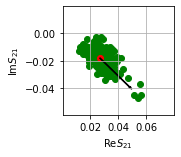

In [32]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(2,2))
r = -np.real(z)[40,:]
i = np.imag(z)[40,:]

medpoint = np.median(r)+1j*np.median(i)

r1 = r - np.real(medpoint)
i1 = i - np.imag(medpoint)

pca = [[np.mean(r1*r1), np.mean(r1*i1)],[np.mean(r1*i1), np.mean(i1*i1)]]
vals, vecs = np.linalg.eigh(pca)
#print(vecs)
direction = vecs[:,np.argmax(vals)]
projections = np.dot(np.asarray([r,  i]).T,direction)
max_extent = np.max(projections)
#print (direction, max_extent)
direction_short = direction*max_extent
#print (direction_short)

plt.arrow(np.real(medpoint), np.imag(medpoint), 
          direction_short[0]*2, direction_short[1]*2,
         color='black', width=0.0005)

plt.scatter(r, i, marker='o', color='green')

plt.scatter(np.real(medpoint), np.imag(medpoint), color='red')
plt.xticks([0.02, 0.04, 0.06])
plt.yticks([-0.04, -0.02, 0.00])
plt.xlim([0.00, 0.08])
plt.ylim([-0.06, 0.02])

#ax = plt.gca()
plt.grid(True)
#ax.set_aspect('equal')
#plt.axis('equal')
plt.xlabel('$\\operatorname{Re} S_{21}$')
plt.ylabel('$\\operatorname{Im} S_{21}$')
plt.savefig('C:\\Users\\User\\PCA-example.png')
plt.savefig('C:\\Users\\User\\PCA-example.svg')
plt.savefig('C:\\Users\\User\\PCA-example.pdf')
plt.show()

# Stuff that went to multiqubit_spectra.py 

In [19]:
fqbare = lambda EJ1, EJ2, EC,flux: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*flux)**2+\
                                                    (EJ1+EJ2)**2*np.cos(np.pi*flux)**2)**0.25-EC

def build_inductance_matrix(parameters):
    qubits = parameters['qubits']
    num_qubits = len(qubits)    
    if parameters['inductance_matrix_type'] == 'chain-nn':
        inductance_matrix = np.zeros((num_qubits, num_qubits))
        for qubit_id_, qubit_id in enumerate(qubits):
            if qubit_id_ > 0:
                inductance_matrix[qubit_id_, qubit_id_-1] = parameters['inductances'][qubit_id]['left']
            inductance_matrix[qubit_id_, qubit_id_] = parameters['inductances'][qubit_id]['central']
            if qubit_id_ < num_qubits-1:
                inductance_matrix[qubit_id_, qubit_id_+1] = parameters['inductances'][qubit_id]['right']
    return inductance_matrix

def model_notebook(parameters, spectra):
    
    qubits = parameters['qubits']
    num_qubits = len(qubits)    
    
    resonator_freqs = [parameters['fr'][qubit_id] for qubit_id in qubits]
    inductance_matrix = build_inductance_matrix(parameters)
    
    frequencies = []
    
    for s_id, data in spectra.iterrows():
        try:
            induced_flux = inductance_matrix@np.asarray(data[qubits].tolist())
        except:
            print ('inductance_matrix:', inductance_matrix)
            print ('data[qubits].tolist():', data[qubits].tolist())
            raise
            
        #print (induced_flux)
        
        qubit_freqs = [fqbare(parameters['EJ1'][qubit_id], 
                              parameters['EJ2'][qubit_id], 
                              parameters['EC'], 
                              induced_flux[qubit_id_]+parameters['phi0'][qubit_id]) 
                           for qubit_id_, qubit_id in enumerate(qubits)]
        
        #print (qubit_freqs)
        
        linear_oscillator_matrix = np.diag(resonator_freqs+qubit_freqs)
        
        # equal qubit-resonator coupling
        if parameters['qubit_resonator_individual'] == 'equal_claws':
            for qubit_id_, qubit_id in enumerate(qubits):
                linear_oscillator_matrix[qubit_id_, qubit_id_+num_qubits] = \
                    parameters['g']*np.sqrt(qubit_freqs[qubit_id_])
                linear_oscillator_matrix[qubit_id_+num_qubits, qubit_id_] = \
                    parameters['g']*np.sqrt(qubit_freqs[qubit_id_])
        
        # qubit-qubit coupling
        if parameters['qubit_qubit_coupling'] == 'alternating-chain-nn':
            for qubit_id_, qubit_id in enumerate(qubits):
                if (qubit_id_ % 2):
                    Jl, Jr = parameters['J1'], parameters['J2']
                else:
                    Jl, Jr = parameters['J2'], parameters['J1']
                    
                if qubit_id_ > 0:
                    linear_oscillator_matrix[num_qubits+qubit_id_, num_qubits+qubit_id_-1] = \
                        Jl*np.sqrt(qubit_freqs[qubit_id_]*qubit_freqs[qubit_id_-1])
                if qubit_id_ < num_qubits-1:
                    linear_oscillator_matrix[num_qubits+qubit_id_, num_qubits+qubit_id_+1] = \
                        Jr*np.sqrt(qubit_freqs[qubit_id_]*qubit_freqs[qubit_id_+1])
#         print(linear_oscillator_matrix)
        print ('linear_oscillator_matrix:', linear_oscillator_matrix)
        qubit_freqs[int(qubit_id)-1]
        try:
            w, v = np.linalg.eigh(linear_oscillator_matrix/1e9)
            #print ('w:', w)
            #print ('v:', v)
            participations = np.abs(v)**2
            qubit_like_mode_id = np.argmax(participations[num_qubits+int(data['qubit_id'])-1,:])
            #print (qubit_like_mode_id )
            frequencies.append(w[qubit_like_mode_id])
        except Exception as e:
            #print (e)
            #print (linear_oscillator_matrix/1e9)
            frequencies.append(qubit_freqs[int(qubit_id)-1])

    return frequencies

In [20]:
qubit_ids = qubits.keys()
parameters_fixed={'fr': {qubit_id: qubit['r']['Fr'] for qubit_id, qubit in qubits.items()}, 'EC':155e6}
def build_parameters_dict_from_podgon_list(p,parameters_fixed):
    num_qubits = len(qubit_ids)
    
    #print (p)
    
    #fr   = p[:num_qubits]
    #p = p[num_qubits:]
    EJ1  = p[:num_qubits]
    p = p[num_qubits:]
    EJ2  = p[:num_qubits]
    p = p[num_qubits:]
    phi0 = p[:num_qubits]
    p = p[num_qubits:]
    
    L = p[:(3*num_qubits-2)]
    p = p[(3*num_qubits-2):]
    #EC   = p[0]
    g    = p[0]
    J1   = p[1]
    J2   = p[2]
    
    inductances = {}
    for qubit_id_, qubit_id in enumerate(qubit_ids):
        inductances[qubit_id] = {'central':L[qubit_id_]}
        if qubit_id_ < num_qubits-1:
            inductances[qubit_id]['right'] = L[num_qubits+qubit_id_]
        if qubit_id_ > 0:
            inductances[qubit_id]['left'] = L[2*num_qubits-2+qubit_id_]
            
    ## inductances are saved as [L_11, L_22, ... L_nn, L_12, L_23, L_34, ..., L_{n-1},n, L_21, L_32, ..., L_n,{n-1}]
    
    parameters = {'qubits':qubit_ids,
              'inductance_matrix_type':'chain-nn',
              'qubit_resonator_individual': 'equal_claws',
              'qubit_qubit_coupling': 'alternating-chain-nn',
              'inductances':inductances,
              #'fr': {qubit_id: fr_*1e9 for qubit_id, fr_ in zip(qubit_ids, fr)},
              'EJ1': {qubit_id: EJ1_*1e9 for qubit_id, EJ1_ in zip(qubit_ids, EJ1)},
              'EJ2': {qubit_id: EJ2_*1e9 for qubit_id, EJ2_ in zip(qubit_ids, EJ2)},
              'phi0': {qubit_id: phi0_ for qubit_id, phi0_ in zip(qubit_ids, phi0)},
              #'EC': EC*1e9,
              'g': g,
              'J1': J1,
              'J2': J2}
    parameters.update(parameters_fixed)
    return parameters

In [21]:
def build_podgon_list_from_parameters_dict(parameters):
    num_qubits = len(parameters['qubits'])
    
    podgon = []
    #podgon.extend([parameters['fr'][qubit_id]/1e9 for qubit_id in qubit_ids])
    podgon.extend([parameters['EJ1'][qubit_id]/1e9 for qubit_id in qubit_ids])
    podgon.extend([parameters['EJ2'][qubit_id]/1e9 for qubit_id in qubit_ids])
    podgon.extend([parameters['phi0'][qubit_id] for qubit_id in qubit_ids])
    
    podgon.extend([parameters['inductances'][qubit_id]['central'] for qubit_id in qubit_ids])
    podgon.extend([parameters['inductances'][qubit_id]['right'] \
                       for qubit_id_, qubit_id in enumerate(qubit_ids) if qubit_id_ < num_qubits-1])
    podgon.extend([parameters['inductances'][qubit_id]['left'] \
                       for qubit_id_, qubit_id in enumerate(qubit_ids) if qubit_id_ > 0])
    
    #podgon.append(parameters['EC']/1e9)
    podgon.append(parameters['g'])
    podgon.append(parameters['J1'])
    podgon.append(parameters['J2'])
    
    return podgon

In [22]:
def build_bounds_from_parameters_dict(parameters):
    num_qubits = len(parameters['qubits'])
    
    podgon_low = []
    #podgon.extend([parameters['fr'][qubit_id]/1e9 for qubit_id in qubit_ids])
    podgon_low.extend([parameters['EJ1'][qubit_id]/1e9/2 for qubit_id in qubit_ids])
    podgon_low.extend([parameters['EJ2'][qubit_id]/1e9/2 for qubit_id in qubit_ids])
    podgon_low.extend([parameters['phi0'][qubit_id]/2 for qubit_id in qubit_ids])
    
    
    podgon_low.extend([-np.abs(parameters['inductances'][qubit_id]['central'])*2 for qubit_id in qubit_ids])
    podgon_low.extend([-np.abs(parameters['inductances'][qubit_id]['right'])*5 \
                       for qubit_id_, qubit_id in enumerate(qubit_ids) if qubit_id_ < num_qubits-1])
    podgon_low.extend([-np.abs(parameters['inductances'][qubit_id]['left'])*5 \
                       for qubit_id_, qubit_id in enumerate(qubit_ids) if qubit_id_ > 0])
    
    #podgon_low.append(parameters['EC']/1e9/2)
    podgon_low.append(parameters['g']/2)
    podgon_low.append(parameters['J1']/1.2)
    podgon_low.append(parameters['J2']/1.2)
    
    
    podgon_up = []
    #podgon.extend([parameters['fr'][qubit_id]/1e9 for qubit_id in qubit_ids])
    podgon_up.extend([parameters['EJ1'][qubit_id]/1e9*2 for qubit_id in qubit_ids])
    podgon_up.extend([parameters['EJ2'][qubit_id]/1e9*2 for qubit_id in qubit_ids])
    podgon_up.extend([parameters['phi0'][qubit_id]*2 for qubit_id in qubit_ids])
    
    podgon_up.extend([np.abs(parameters['inductances'][qubit_id]['central'])*2 for qubit_id in qubit_ids])
    podgon_up.extend([np.abs(parameters['inductances'][qubit_id]['right'])*5 \
                       for qubit_id_, qubit_id in enumerate(qubit_ids) if qubit_id_ < num_qubits-1])
    podgon_up.extend([np.abs(parameters['inductances'][qubit_id]['left'])*5 \
                       for qubit_id_, qubit_id in enumerate(qubit_ids) if qubit_id_ > 0])
    
    #podgon_up.append(parameters['EC']/1e9*2)
    podgon_up.append(parameters['g']*2)
    podgon_up.append(parameters['J1']*1.5)
    podgon_up.append(parameters['J2']*1.5)
    
    
    return tuple([tuple(podgon_low),tuple(podgon_up)])

In [15]:
def build_p0_dict():
    L =   {'1':-0.11182, '2': -0.11217, '3': -0.11249, '4': -0.11300, '5': -0.11103, '6': -0.10783, 
           '7':-0.10364, '8': -0.11033, '9': -0.11038, '10': -0.10766, '11': -0.11556}
    EJ1 = {'1': 11.816e9, '2': 11.168e9, '3': 11.815e9, '4': 11.263e9, '5': 10.981e9, '6': 10.909e9,
           '7': 11.666e9, '8': 10.903e9, '9': 11.563e9, '10': 11.045e9, '11': 11.265e9}
    EJ2 = {'1': 1.9435e9, '2': 1.6731e9, '3': 1.9114e9, '4': 1.7694e9, '5': 1.8107e9, '6': 1.6079e9,
           '7': 1.9888e9, '8': 2.1891e9, '9': 2.0010e9, '10': 1.9410e9, '11': 1.9456e9}
    phi0 = {'1': 0.0796, '2': 0.0869, '3': 0.0828, '4': 0.0845, '5': 0.0861, '6': 0.0919,
           '7': 0.0759, '8': 0.0815, '9': 0.0758, '10': 0.0703, '11': 0.0813}
    parameters = {
    'qubits': [qubit_id for qubit_id in qubits.keys()],
    'fr': {qubit_id: qubit['r']['Fr'] for qubit_id, qubit in qubits.items()},
    'EJ1': EJ1,
    'EJ2': EJ2,
#      'EC': 155e6,
    'phi0':phi0,
    'J1':0.015,#0.0129,
    'J2':0.004,#0.0033,
    'g':0.008*np.sqrt(6.6e9),
    'inductances':{qubit_id:{'central': L[qubit_id], 'left':1e-3, 'right':1e-3} for qubit_id in qubits.keys()},
    'inductance_matrix_type':'chain-nn',
    'qubit_resonator_individual': 'equal_claws',
    'qubit_qubit_coupling': 'alternating-chain-nn',             
                 }
    return parameters

In [16]:
qubit_ids = qubits.keys()
parameters_fixed = {'EC':155e6}
p0_dict = build_p0_dict()
p0_list = build_podgon_list_from_parameters_dict(p0_dict)
p0_dict_backwards = build_parameters_dict_from_podgon_list(p0_list,parameters_fixed, qubit_ids=qubit_ids)
p0_dict_backwards, p0_dict

({'qubits': dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']),
  'inductance_matrix_type': 'chain-nn',
  'qubit_resonator_individual': 'equal_claws',
  'qubit_qubit_coupling': 'alternating-chain-nn',
  'inductances': {'1': {'central': -0.11182, 'right': 0.001},
   '2': {'central': -0.11217, 'right': 0.001, 'left': 0.001},
   '3': {'central': -0.11249, 'right': 0.001, 'left': 0.001},
   '4': {'central': -0.113, 'right': 0.001, 'left': 0.001},
   '5': {'central': -0.11103, 'right': 0.001, 'left': 0.001},
   '6': {'central': -0.10783, 'right': 0.001, 'left': 0.001},
   '7': {'central': -0.10364, 'right': 0.001, 'left': 0.001},
   '8': {'central': -0.11033, 'right': 0.001, 'left': 0.001},
   '9': {'central': -0.11038, 'right': 0.001, 'left': 0.001},
   '10': {'central': -0.10766, 'right': 0.001, 'left': 0.001},
   '11': {'central': -0.11556, 'left': 0.001}},
  'EJ1': {'1': 11816000000.0,
   '2': 11168000000.0,
   '3': 11815000000.0,
   '4': 11263000000.0,
   '5': 1098100

In [96]:
p = exdir_db_inst.select_measurement(measurement_type="Adaptive_two_tone_spectroscopy_parameters", 
                            metadata={'qubit_id':qubit_id}).metadata ## TODO: should be loaded by reference
    
p0 = [float(p[key]) for key in ['frb', 'Cc', 'EJ1', 'EJ2', 'EC', 'phi0', 'L']]

In [97]:
two_tone_adaptive_plot(x,y,np.abs(data_abs(z)),p0)

In [85]:
fit=find_freqs_abs(np.abs(data_abs(z)),y)

In [86]:
plt.plot(x,fit/1e3+fq_coil(p0,x),'ro')

In [32]:
# model_result_fit = model( build_parameters_dict_from_podgon_list(fitresults.x,parameters_fixed),spectr)
plt.figure()
plt.plot(model_result_fit[:180],'ro')

In [98]:
x,y,z=get_Adaptive_two_tone_spectroscopy(exdir_db_inst, qubit_id, True)

In [99]:
# plt.figure()
plt.plot(x,y,'yo')

In [19]:
parameters_fixed['EC'] = 155e6
p0_dict['EC'] = 155e6

In [138]:
build_parameters_dict_from_podgon_list(fitresults.x,parameters_fixed)

{'qubits': dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']),
 'inductance_matrix_type': 'chain-nn',
 'qubit_resonator_individual': 'equal_claws',
 'qubit_qubit_coupling': 'alternating-chain-nn',
 'inductances': {'1': {'central': -0.11127990967190528,
   'right': -0.0003065380472051947},
  '2': {'central': -0.11291656612322272,
   'right': -6.280461627477399e-05,
   'left': 0.0015440307301384302},
  '3': {'central': -0.11231766871334202,
   'right': -0.0003477194009007033,
   'left': 0.0004535006264637788},
  '4': {'central': -0.11063460000121661,
   'right': -0.00034454198557230836,
   'left': 0.0008751764689982227},
  '5': {'central': -0.1140591755449364,
   'right': -0.0008013755124480336,
   'left': 0.00031788494480452606},
  '6': {'central': -0.10791224693034283,
   'right': 0.0006868184280775261,
   'left': 0.0005639843338972886},
  '7': {'central': -0.10594717871946066,
   'right': -0.0019035468376659352,
   'left': 0.0005690391683310114},
  '8': {'central': -

In [16]:
%matplotlib qt5
# model_result = model(p0_dict, spectra)
model_result_fit = model_notebook(build_parameters_dict_from_podgon_list(fitresults.x,parameters_fixed),spectra)
# model_result_fit = model(fitresults_last,spectra)
fig, axes = plt.subplots(2,1,figsize=(10,8))
x = np.arange(len(spectra))
c = ['C' + str(c) for c in spectra['qubit_id']]
axes[0].scatter(x, np.asarray(spectra['f']).tolist(), c=c, marker='o')
axes[0].scatter(x, model_result_fit, c=c, marker='x')
axes[1].scatter(x, np.asarray(spectra['f']).tolist(), c=c, marker='o')
axes[1].scatter(x, model_result, c=c, marker='x')
plt.show()
#build_parameters_dict_from_podgon_list(fitresults.x, parameters_fixed)


NameError: name 'fitresults' is not defined

In [40]:
parameters = model(fitresults,spectr)

In [17]:
build_parameters_dict_from_podgon_list(fitresults.x,parameters_fixed)

NameError: name 'fitresults' is not defined

In [131]:
%matplotlib qt5
model_result_fit = model( build_parameters_dict_from_podgon_list(fitresults.x,parameters_fixed),spectr)
x = np.arange(len(spectr))
c = ['C' + str(c) for c in spectr['qubit_id']]
plt.figure()
plt.scatter(x, np.asarray(spectr['f']).tolist(), c=c, marker='o')
plt.scatter(x, model_result_fit, c=c, marker='x')
plt.show()